# Earthquake data science project

In [1]:
import urllib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from os.path import exists
import json
from pathlib import Path
import numpy as np
import plotly.express as px

# Definitions

NCEI API contains definitions of certain terms contained in the data. These are read using the descriptors module and shown here.

In [2]:
from descriptors import fetch_descriptor

In [3]:
# ID : Cost of damage
damage = fetch_descriptor('effect/damage')
damage

id                     description
0  0                            None
1  1           Limited (<$1 million)
2  2    Moderate (~$1 to $5 million)
3  3    Severe (~>$5 to $24 million)
4  4  Extreme (~$25 million or more)

In [4]:
# ID : Number of houses affected
houses = fetch_descriptor('effect/houses')
houses

id                       description
0  0                              None
1  1             Few (~1 to 50 houses)
2  2          Some (~51 to 100 houses)
3  3        Many (~101 to 1000 houses)
4  4  Very Many (~1001 or more houses)

In [5]:
# ID : Number of people affected
people = fetch_descriptor('effect/people')
people

id                       description
0  0                              None
1  1             Few (~1 to 50 people)
2  2          Some (~51 to 100 people)
3  3        Many (~101 to 1000 people)
4  4  Very Many (~1001 or more people)

In [6]:
# ID : area of the world
regions = fetch_descriptor('earthquake/regions')
# Edit df for consistency with data columns (read later)
regions.rename({"id": "regionCode"}, axis=1, inplace=True)
regions['regionCode'] = regions['regionCode'].astype(int)
regions.set_index('regionCode', inplace=True)
regions

description
regionCode                                  
10            Central, Western and S. Africa
15                           Northern Africa
20                                Antarctica
30                                 East Asia
40                 Central Asia and Caucasus
50               Kamchatka and Kuril Islands
60          S. and SE. Asia and Indian Ocean
70                            Atlantic Ocean
80                                Bering Sea
90                                 Caribbean
100                          Central America
110                           Eastern Europe
120              Northern and Western Europe
130                          Southern Europe
140                              Middle East
150                 North America and Hawaii
160                            South America
170                Central and South Pacific

# Read data

Data obtained from the API available via the National Centers for Environmental Information (NCEI; formally National Geophysical Data Center (NGDC)).

https://www.ngdc.noaa.gov

Citation: National Geophysical Data Center / World Data Service (NGDC/WDS): NCEI/WDS Global Significant Earthquake Database. NOAA National Centers for Environmental Information. doi:10.7289/V5TD9V7K [23/05/22]

API documentation:
- Click headings in table: https://www.ngdc.noaa.gov/hazel/view/hazards/earthquake/event-data
- List of available descriptors: https://www.ngdc.noaa.gov/hazel/view/swagger#/

The API documentation is not particularly clear so the start of the EDA section below gives descriptions of some of the unclear data columns as I have understood them.

In [7]:
# API url
url = 'https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/earthquakes'

In [8]:
Path("data").mkdir(parents=True, exist_ok=True) # Make directory to hold json files if not already created

In [9]:
# Retrieve data from url and write to json file
urllib.request.urlretrieve(url, 'data/earthquake-data.json')

('data/earthquake-data.json', <http.client.HTTPMessage at 0x24aa07b0dc0>)

In [10]:
# Load data using Python JSON module
with open('data/earthquake-data.json','r') as f:
    data = json.loads(f.read())

In [11]:
eq = pd.json_normalize(data, record_path=['items'])
eq.set_index('id', inplace=True)

In [12]:
eq.head()

year                                       locationName  latitude  \
id                                                                      
40    17  TURKEY:  IZMIR, EFES, AYDIN, MANISA, ALASEHIR,...    37.850   
49    52                     GREECE:  PHILIPPI,DRAMA,KAVALA    41.000   
58    79                            ITALY:  NAPLES (NAPOLI)    40.821   
61    93                                TURKEY:  HELLESPONT    40.600   
66   138                             CHINA:  GANSU PROVINCE    35.800   

    longitude  intensity  damageAmountOrder  publish  damageAmountOrderTotal  \
id                                                                             
40     27.300       10.0                3.0     True                     3.0   
49     24.300        NaN                3.0     True                     NaN   
58     14.426       10.0                NaN     True                     NaN   
61     26.700        NaN                3.0     True                     NaN   
66    103.500        9.0                3.0     True                     3.0   

   country  regionCode  ...  eqMagMb  damageMillionsDollars  \
id                      ...                                   
40  TURKEY         140  ...      NaN                    NaN   
49  GREECE         130  ...      NaN                    NaN   
58   ITALY         130  ...      NaN                    NaN   
61  TURKEY         140  ...      NaN                    NaN   
66   CHINA          30  ...      NaN                    NaN   

    damageMillionsDollarsTotal  housesDamaged  missingAmountOrderTotal  \
id                                                                       
40                         NaN            NaN                      NaN   
49                         NaN            NaN                      NaN   
58                         NaN            NaN                      NaN   
61                         NaN            NaN                      NaN   
66                         NaN            NaN                      NaN   

    eqMagMl  missing  missingAmountOrder  missingTotal  eqMagMfa  
id                                                                
40      NaN      NaN                 NaN           NaN       NaN  
49      NaN      NaN                 NaN           NaN       NaN  
58      NaN      NaN                 NaN           NaN       NaN  
61      NaN      NaN                 NaN           NaN       NaN  
66      NaN      NaN                 NaN           NaN       NaN  

[5 rows x 48 columns]

# Exploratory data analysis

## Structure

In [13]:
eq.shape

(6323, 48)

In [14]:
eq.columns

Index(['year', 'locationName', 'latitude', 'longitude', 'intensity',
       'damageAmountOrder', 'publish', 'damageAmountOrderTotal', 'country',
       'regionCode', 'second', 'month', 'day', 'tsunamiEventId',
       'volcanoEventId', 'deathsTotal', 'deathsAmountOrderTotal',
       'deathsAmountOrder', 'eqMagnitude', 'housesDestroyedAmountOrder',
       'eqMagMs', 'housesDestroyedAmountOrderTotal', 'deaths', 'eqDepth',
       'eqMagUnk', 'hour', 'minute', 'housesDestroyedTotal', 'housesDestroyed',
       'injuriesAmountOrder', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrder', 'housesDamagedAmountOrderTotal', 'eqMagMw',
       'housesDamagedTotal', 'injuries', 'injuriesTotal', 'area', 'eqMagMb',
       'damageMillionsDollars', 'damageMillionsDollarsTotal', 'housesDamaged',
       'missingAmountOrderTotal', 'eqMagMl', 'missing', 'missingAmountOrder',
       'missingTotal', 'eqMagMfa'],
      dtype='object')

In [15]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6323 entries, 40 to 10627
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             6323 non-null   int64  
 1   locationName                     6322 non-null   object 
 2   latitude                         6271 non-null   float64
 3   longitude                        6271 non-null   float64
 4   intensity                        3003 non-null   float64
 5   damageAmountOrder                4570 non-null   float64
 6   publish                          6323 non-null   bool   
 7   damageAmountOrderTotal           3595 non-null   float64
 8   country                          6322 non-null   object 
 9   regionCode                       6323 non-null   int64  
 10  second                           4411 non-null   float64
 11  month                            5912 non-null   float64
 12  day               

- Lots of missing data that will be dealt with later.
- Some datatypes can be changed (e.g. year, month etc).

API documentation states that e.g. deathsTotal is the total number of deaths from the earthquake as well as its secondary effects, such as tsunamis and volcanoes. Same for missing, damage etc.

When a column contains 'AmountOrder', e.g. deathsAmountOrder, the value represents a classification of the number of deaths. In literature, the exact number of deaths is not always recorded so has to be estimated based on other factors.  For cases where the exact number of deaths is given, a classification is still given for completeness.

In [16]:
eq.describe(exclude='number')

locationName publish country area
count                      6322    6323    6322  326
unique                     3928       1     156   32
top     CHINA:  YUNNAN PROVINCE    True   CHINA   CA
freq                         68    6323     615  103

- Country with most earthquakes is China, specifically the Yunnan province.
- 'publish' is true in every case (unclear from API documentation what this is - possibly whether earthquake details are published somewhere?).
- Area with most earthquakes is CA. These appear to be North American state codes (see here for list: https://www.fs.fed.us/database/feis/format.html) so CA is California.
- Seems to be overlap between 'area' and 'locationName'.  'area' could be expanded to non-NA states by extracting the location from 'locationName'. Could use 'country' for this.  Or vice verse, could add 'area' to 'locationName'.

In [17]:
eq.iloc[:, 0:10].describe() # Show 9 columns only so whole df is shown and can be discussed bit by bit

year     latitude    longitude    intensity  damageAmountOrder  \
count  6323.000000  6271.000000  6271.000000  3003.000000        4570.000000   
mean   1808.017871    22.348465    38.059670     8.244422           2.272867   
std     374.587772    22.894632    86.760795     1.803708           0.958168   
min   -2150.000000   -62.877000  -179.984000     2.000000           1.000000   
25%    1822.000000     9.317000    -8.000000     7.000000           2.000000   
50%    1930.000000    32.000000    43.443000     8.000000           2.000000   
75%    1990.000000    38.700000   115.300000    10.000000           3.000000   
max    2022.000000    73.122000   180.000000    12.000000           4.000000   

       damageAmountOrderTotal   regionCode  
count             3595.000000  6323.000000  
mean                 2.221975   106.888344  
std                  1.022679    53.664885  
min                  1.000000    10.000000  
25%                  1.000000    50.000000  
50%                  2.000000   130.000000  
75%                  3.000000   150.000000  
max                  4.000000   170.000000

- Dataset consists of earthquakes recorded from 2150BC to 2022AD. Most are more recent than ~1800.
- 'intensity' is actually the MMI intensity (modified Mercalli intensity) - values range from 1 to 12 where 1 is "not felt other than in especially favorable circumstances" and 12 is "Damage total - waves seen on ground surface and line of sight distorted".
- 'damageAmountOrder' is a five-level scale used to classify damage (based on current U.S. dollars). See 'damage' dataframe in Definitions section for what each code means. This was required as exact amount of damage not always clear from literature. 'damageAmountOrderTotal' is the same except also includes the earthquakes secondary effects.
- 'regionCode' is an integer code corresponding to the region of the World. See 'regions' dataframe in Definitions section for what each code means.

In [18]:
eq.iloc[:, 10:19].describe()

second        month          day  tsunamiEventId  volcanoEventId  \
count  4411.000000  5912.000000  5756.000000     1947.000000       77.000000   
mean     19.779347     6.498309    15.756776     2283.941962     3702.662338   
std      19.671065     3.448634     8.734798     1691.273784     2414.828427   
min       0.000000     1.000000     1.000000        1.000000        1.000000   
25%       0.000000     4.000000     8.000000     1021.500000     1346.000000   
50%      14.800000     7.000000    16.000000     1883.000000     3833.000000   
75%      36.850000     9.000000    23.000000     3165.500000     5324.000000   
max      59.900000    12.000000    31.000000     5850.000000     7542.000000   

         deathsTotal  deathsAmountOrderTotal  deathsAmountOrder  eqMagnitude  
count    1898.000000             2266.000000        2598.000000  4544.000000  
mean     3902.404110                1.960282           2.003079     6.450110  
std     26885.006613                1.166195           1.154252     1.039639  
min         1.000000                1.000000           0.000000     1.600000  
25%         3.000000                1.000000           1.000000     5.700000  
50%        18.000000                1.000000           1.000000     6.500000  
75%       258.000000                3.000000           3.000000     7.300000  
max    830000.000000                4.000000           4.000000     9.500000

- 'second', 'month' and 'day' can be combined into datetime object later (with other time related columns).
- 'tsunamiEventId' and 'volcanoEventId' are the id number of the tsunami/volcano eruption caused by each earthquake, if applicable.
- 'deathsTotal' likely contains some outliers as mean long way from median.
- eqMagnitude is the standard earthquake magnitude measurement (energy released at the source of the earthquake).  For pre-instrumental events, the magnitudes are derived from intensities.

In [19]:
eq.iloc[:, 19:30].describe()

housesDestroyedAmountOrder      eqMagMs  \
count                 1822.000000  2984.000000   
mean                     2.679473     6.566521   
std                      1.060709     0.988347   
min                      0.000000     2.100000   
25%                      2.000000     5.800000   
50%                      3.000000     6.600000   
75%                      3.000000     7.300000   
max                      4.000000     9.100000   

       housesDestroyedAmountOrderTotal         deaths      eqDepth  \
count                      1904.000000    2114.000000  3349.000000   
mean                          2.686975    3714.273888    40.439534   
std                           1.055336   25120.677882    69.687065   
min                           1.000000       1.000000     0.000000   
25%                           2.000000       3.000000    10.000000   
50%                           3.000000      20.500000    25.000000   
75%                           3.000000     300.000000    39.000000   
max                           4.000000  830000.000000   675.000000   

         eqMagUnk         hour       minute  housesDestroyedTotal  \
count  794.000000  4271.000000  4066.000000          8.750000e+02   
mean     6.652141    11.304613    28.744712          1.763441e+04   
std      1.005622     7.015718    17.170149          1.890305e+05   
min      3.200000     0.000000     0.000000          1.000000e+00   
25%      6.000000     5.000000    14.000000          6.650000e+01   
50%      6.800000    11.000000    29.000000          5.060000e+02   
75%      7.500000    17.000000    43.000000          3.395000e+03   
max      8.800000    23.000000    59.000000          5.360000e+06   

       housesDestroyed  injuriesAmountOrder  
count     8.430000e+02          1548.000000  
mean      1.709926e+04             1.958010  
std       1.909376e+05             1.079356  
min       1.000000e+00             1.000000  
25%       6.850000e+01             1.000000  
50%       5.060000e+02             1.000000  
75%       3.600000e+03             3.000000  
max       5.360000e+06             4.000000

- There are various magnitude scales used to measure earthquakes. These are X=[Mw, Ms, Mb, Ml, Mfa, Unknown] and are shown in the eqMagX columns. The value given in 'eqMagnitude' is chosen based on what is available, in the order of X.
- 'eqDepth' is the depth of the earthquake measured in km. Looks like most earthquakes occur shallower than the mean depth.

In [20]:
eq.iloc[:, 30:40].describe()

injuriesAmountOrderTotal  housesDamagedAmountOrder  \
count               1569.000000               1042.000000   
mean                   1.955386                  2.565259   
std                    1.076440                  1.118383   
min                    1.000000                  1.000000   
25%                    1.000000                  2.000000   
50%                    1.000000                  3.000000   
75%                    3.000000                  4.000000   
max                    4.000000                  4.000000   

       housesDamagedAmountOrderTotal      eqMagMw  housesDamagedTotal  \
count                     932.000000  1540.000000        4.730000e+02   
mean                        2.520386     6.502143        5.417330e+04   
std                         1.131813     0.905697        9.658475e+05   
min                         1.000000     3.600000        1.000000e+00   
25%                         1.000000     5.800000        1.000000e+02   
50%                         3.000000     6.400000        7.000000e+02   
75%                         4.000000     7.200000        3.042000e+03   
max                         4.000000     9.500000        2.100000e+07   

            injuries  injuriesTotal      eqMagMb  damageMillionsDollars  
count    1328.000000    1349.000000  1823.000000             540.000000  
mean     2176.969127    2360.369162     5.789687            1208.431502  
std     25595.782643   26653.747197     0.727229            6553.597118  
min         1.000000       1.000000     2.100000               0.013000  
25%        10.000000      10.000000     5.300000               4.000000  
50%        40.000000      41.000000     5.800000              24.400000  
75%       200.000000     200.000000     6.300000             228.175000  
max    799000.000000  799000.000000     8.200000          100000.000000

- 'damageMillionsDollars' is the exact amount of damage caused by the earthquake (based on the current dollar value). This is what is used to place the earthquake in a 'damageAmountOrder' category, if it is available.

In [21]:
eq.iloc[:, 40:49].describe() # End of dataframe columns

damageMillionsDollarsTotal  housesDamaged  missingAmountOrderTotal  \
count                  513.000000   5.290000e+02                32.000000   
mean                  1711.372250   2.402671e+04                 1.781250   
std                  11768.933713   2.403840e+05                 1.039056   
min                      0.010000   1.000000e+00                 1.000000   
25%                      5.000000   9.200000e+01                 1.000000   
50%                     26.271000   7.000000e+02                 1.000000   
75%                    285.000000   3.700000e+03                 3.000000   
max                 220136.600000   5.360000e+06                 4.000000   

          eqMagMl       missing  missingAmountOrder  missingTotal   eqMagMfa  
count  188.000000     25.000000           25.000000     28.000000  14.000000  
mean     5.380319   1864.440000            1.760000   1734.392857   6.771429  
std      1.110565   8672.299638            0.969536   8189.406361   1.230027  
min      1.600000      1.000000            1.000000      1.000000   4.300000  
25%      4.700000      4.000000            1.000000      3.750000   6.225000  
50%      5.400000     17.000000            1.000000     25.500000   7.050000  
75%      6.025000    114.000000            3.000000    153.500000   7.475000  
max      7.700000  43476.000000            4.000000  43476.000000   8.500000

- 'missing' is the number of people missing.

In [22]:
eq.shape

(6323, 48)

Based on the above points, clean up the dataframe:

In [23]:
# Remove 'publish' column
eq.drop('publish', axis=1, inplace=True)

In [24]:
# Combine year, month, day columns into one (negative years converted to NaT but will likely be dropped after EDA is complete)
eq['date'] = pd.to_datetime(eq[['year','month', 'day']], errors='coerce')
# Keep year column (for EDA later) but drop month and day
eq.drop(['month', 'day'], axis=1, inplace=True)

In [25]:
# hour, minute, second is not interesting and is also missing from ~1/3 of dataset so remove
eq.drop(['hour', 'minute', 'second'], axis=1, inplace=True)

In [26]:
eq.columns

Index(['year', 'locationName', 'latitude', 'longitude', 'intensity',
       'damageAmountOrder', 'damageAmountOrderTotal', 'country', 'regionCode',
       'tsunamiEventId', 'volcanoEventId', 'deathsTotal',
       'deathsAmountOrderTotal', 'deathsAmountOrder', 'eqMagnitude',
       'housesDestroyedAmountOrder', 'eqMagMs',
       'housesDestroyedAmountOrderTotal', 'deaths', 'eqDepth', 'eqMagUnk',
       'housesDestroyedTotal', 'housesDestroyed', 'injuriesAmountOrder',
       'injuriesAmountOrderTotal', 'housesDamagedAmountOrder',
       'housesDamagedAmountOrderTotal', 'eqMagMw', 'housesDamagedTotal',
       'injuries', 'injuriesTotal', 'area', 'eqMagMb', 'damageMillionsDollars',
       'damageMillionsDollarsTotal', 'housesDamaged',
       'missingAmountOrderTotal', 'eqMagMl', 'missing', 'missingAmountOrder',
       'missingTotal', 'eqMagMfa', 'date'],
      dtype='object')

In [27]:
# Rename intensity to mm_intensity for consistency with API docs
eq.rename(columns={"intensity": "mm_intensity"}, inplace=True)

In [28]:
# Replace regionCode with region name according to definitions held in 'regions' dataframe
eq['region'] = eq['regionCode'].map(regions['description'], na_action='ignore')
eq.drop('regionCode', axis=1, inplace=True)

In [29]:
# Rename eqMagnitude and eqDepth
eq.rename(columns={"eqMagnitude": "magnitude", "eqDepth": "depth"}, inplace=True)

In [30]:
# Drop alternative magnitude measurements (the one used as 'magnitude' is the first that exists out of
# [Mw, Ms, Mb, Ml, Mfa, Unknown] so the breakdown is not required here)
eq.drop(['eqMagMw', 'eqMagMs', 'eqMagMb', 'eqMagMl', 'eqMagMfa', 'eqMagUnk'], axis=1, inplace=True)

In [31]:
eq.columns

Index(['year', 'locationName', 'latitude', 'longitude', 'mm_intensity',
       'damageAmountOrder', 'damageAmountOrderTotal', 'country',
       'tsunamiEventId', 'volcanoEventId', 'deathsTotal',
       'deathsAmountOrderTotal', 'deathsAmountOrder', 'magnitude',
       'housesDestroyedAmountOrder', 'housesDestroyedAmountOrderTotal',
       'deaths', 'depth', 'housesDestroyedTotal', 'housesDestroyed',
       'injuriesAmountOrder', 'injuriesAmountOrderTotal',
       'housesDamagedAmountOrder', 'housesDamagedAmountOrderTotal',
       'housesDamagedTotal', 'injuries', 'injuriesTotal', 'area',
       'damageMillionsDollars', 'damageMillionsDollarsTotal', 'housesDamaged',
       'missingAmountOrderTotal', 'missing', 'missingAmountOrder',
       'missingTotal', 'date', 'region'],
      dtype='object')

In [32]:
# Rename damage columns so they are consistent with the other columns naming scheme
eq.rename(columns={'damageAmountOrder': 'damageMillionsDollarsAmountOrder',
                   'damageAmountOrderTotal': 'damageMillionsDollarsAmountOrderTotal'},
          inplace=True)

In [33]:
# Remove columns that are a combination of earthquake+secondary effects
effects = ['deaths', 'damageMillionsDollars', 'housesDestroyed', 'injuries', 'housesDamaged', 'missing']
for e in effects:
    eq.drop([e+'Total', e+'AmountOrderTotal'], axis=1, inplace=True) # Drop combined earthquake, volcano and tsunami effects
    eq.rename(columns={e+'AmountOrder': e+'Category'}, inplace=True) # Rename column to something that makes more sense

In [34]:
eq.shape

(6323, 25)

In [35]:
# Re-order columns
eq = eq.reindex(columns=['date', 'year', 'region', 'locationName', 'country', 'area', 'latitude', 'longitude', 'magnitude',
                         'mm_intensity', 'depth', 'deaths', 'deathsCategory', 'missing', 'missingCategory', 'injuries',
                         'injuriesCategory', 'housesDestroyed', 'housesDestroyedCategory', 'housesDamaged',
                         'housesDamagedCategory', 'damageMillionsDollars', 'damageMillionsDollarsCategory',
                         'tsunamiEventId', 'volcanoEventId'])

In [36]:
eq.shape

(6323, 25)

In [37]:
eq.columns

Index(['date', 'year', 'region', 'locationName', 'country', 'area', 'latitude',
       'longitude', 'magnitude', 'mm_intensity', 'depth', 'deaths',
       'deathsCategory', 'missing', 'missingCategory', 'injuries',
       'injuriesCategory', 'housesDestroyed', 'housesDestroyedCategory',
       'housesDamaged', 'housesDamagedCategory', 'damageMillionsDollars',
       'damageMillionsDollarsCategory', 'tsunamiEventId', 'volcanoEventId'],
      dtype='object')

## Quality

In [38]:
# Check for duplicates
eq.duplicated().sum()

3

In [39]:
eq[eq.duplicated() == True]

date  year                       region          locationName  \
id                                                                  
686  NaT  1516              Southern Europe  BALKANS NW:  CROATIA   
605  NaT  1454  Northern and Western Europe           SWITZERLAND   
480  NaT  1280              Southern Europe  BALKANS NW:  CROATIA   

         country area  latitude  longitude  magnitude  mm_intensity  ...  \
id                                                                   ...   
686      CROATIA  NaN      42.6       18.1        NaN          10.0  ...   
605  SWITZERLAND  NaN      47.5        7.6        NaN           NaN  ...   
480      CROATIA  NaN      44.1       15.2        NaN          10.0  ...   

     injuries  injuriesCategory  housesDestroyed  housesDestroyedCategory  \
id                                                                          
686       NaN               NaN              NaN                      NaN   
605       NaN               NaN              NaN                      NaN   
480       NaN               NaN              NaN                      NaN   

     housesDamaged  housesDamagedCategory  damageMillionsDollars  \
id                                                                 
686            NaN                    NaN                    NaN   
605            NaN                    NaN                    NaN   
480            NaN                    NaN                    NaN   

     damageMillionsDollarsCategory  tsunamiEventId  volcanoEventId  
id                                                                  
686                            NaN             NaN             NaN  
605                            NaN             NaN             NaN  
480                            NaN             NaN             NaN  

[3 rows x 25 columns]

In [40]:
# Remove duplicates
eq.drop_duplicates(inplace=True)

In [41]:
eq.shape

(6320, 25)

In [42]:
# Check for rows with large sections of missing data
import missingno as msno

<AxesSubplot:>

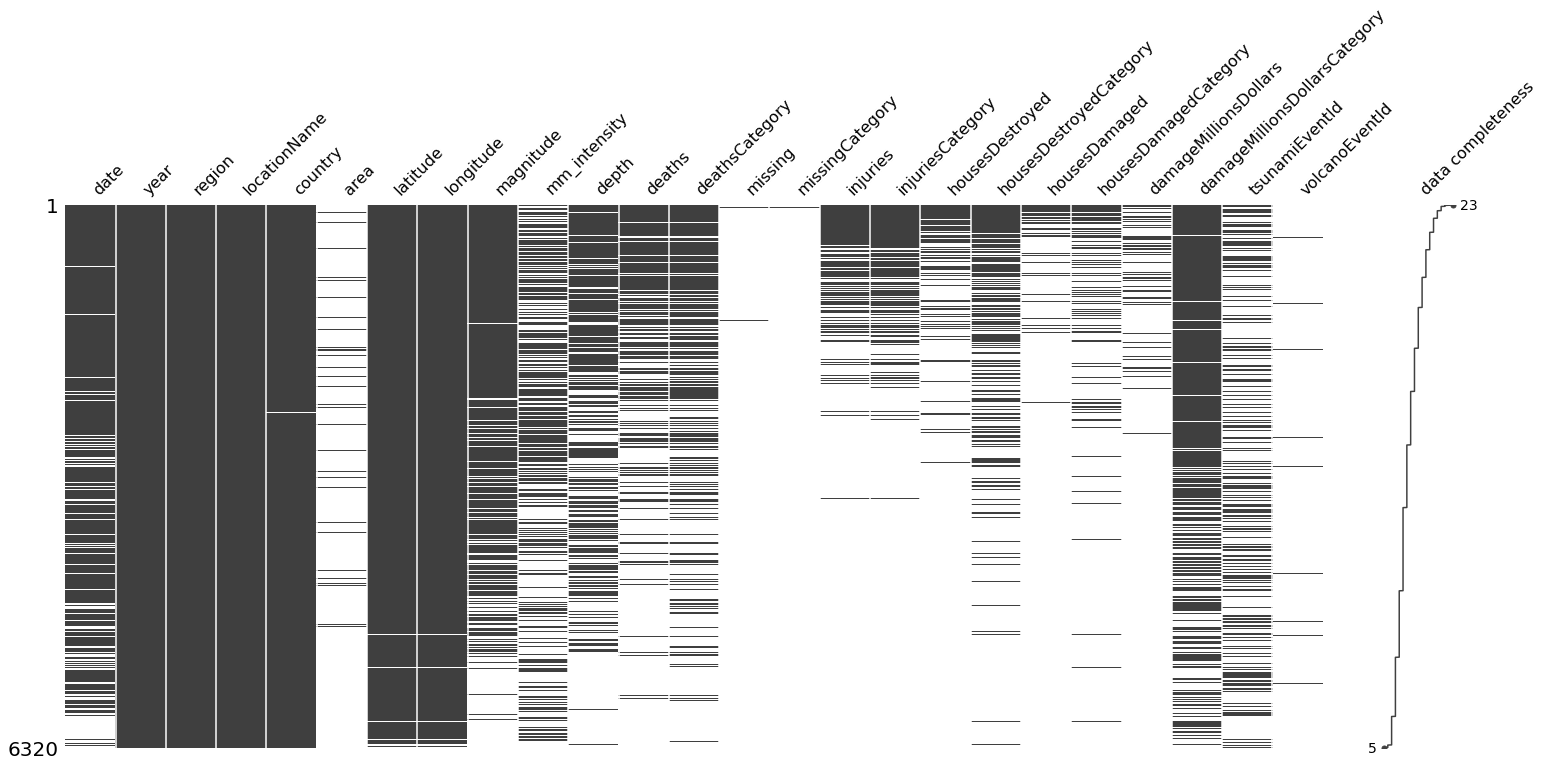

In [43]:
msno.matrix(eq, labels=True, sort='descending')

Lots of missing data! Are any of the missing points correlated?

<AxesSubplot:>

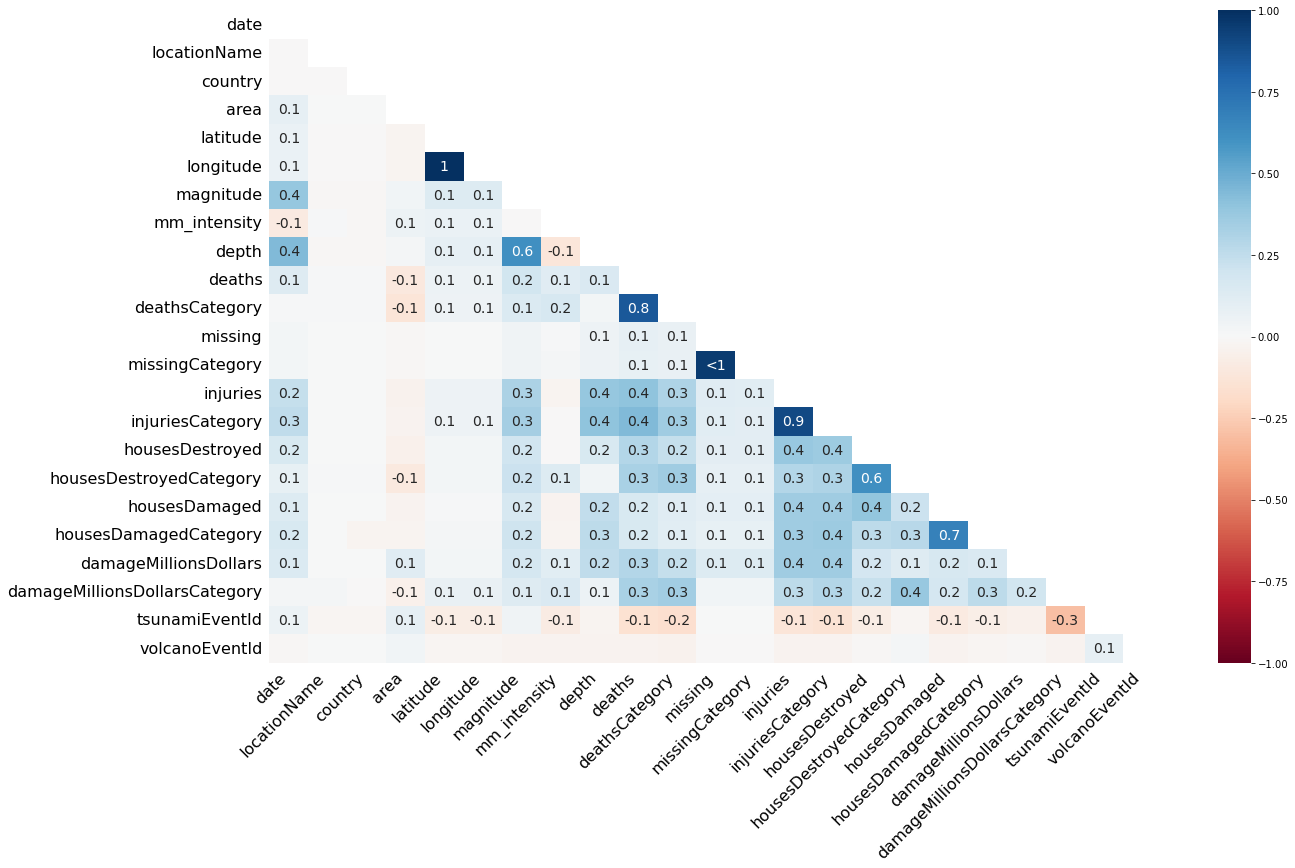

In [44]:
msno.heatmap(eq)

High positive correlation between e.g. 'deaths' and 'deathsCategory' missing value as one would expect.

The correlation between e.g. 'magnitude' and 'date' missing values (as well as other positive correlations present) is presumably earthquakes from the non-modern era where little is known about them.

Before investigating rows with lots of missing data, check the number of missing values per feature.

Text(0, 0.5, 'Proportion of missing values per feature')

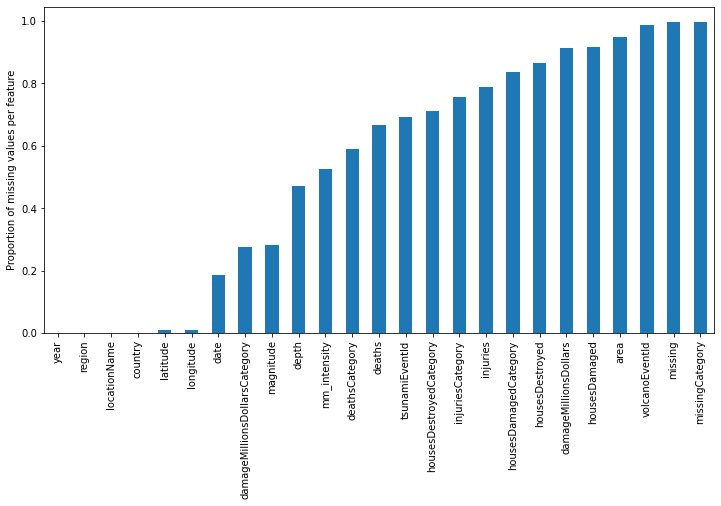

In [45]:
eq.isna().mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.ylabel('Proportion of missing values per feature')

Can I predict the number of:
- deaths based on the location/magnitude/damage/depth?
- injuries based on the number of deaths?
- houses damaged/destroyed based on location/magnitude/damage/depth/damage?

The area column can possibly be combined with region/locationName, as mentioned earlier.

Exact amount of damageMillionsDollars is missing in a large number of cases but the damageMillionsDollarsCategory does not have too many missing points.

Will try to fill some of the missing data points as described above. Drop the features where there are too many missing or if a different category provides a better measurement of a similar feature.

In [46]:
# Drop features with too many missing datapoints
eq.drop(['missing', 'missingCategory', 'damageMillionsDollars'], axis=1, inplace=True)
# Also drop 'mm_intensity' as 'magnitude' provides a similar measurement and has far fewer missing points
eq.drop('mm_intensity', axis=1, inplace=True)

Text(0, 0.5, 'Proportion of missing values per feature')

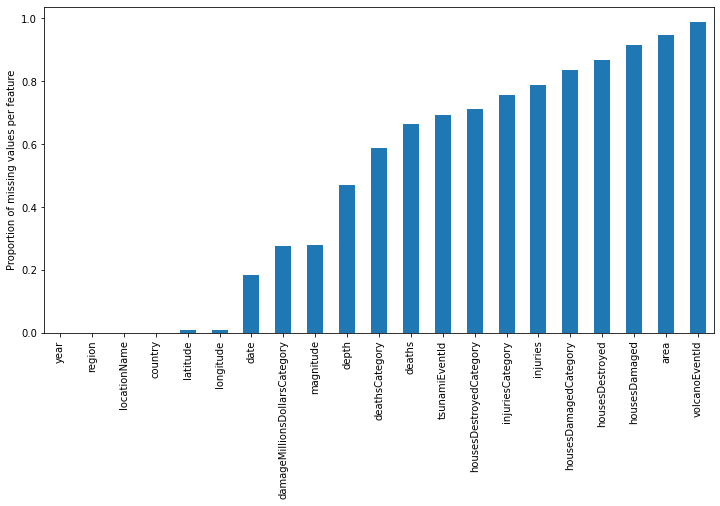

In [47]:
eq.isna().mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.ylabel('Proportion of missing values per feature')

In [48]:
# Entries with no tsunami and volcano event ID mean neither occured. Replace with 0/1 depending on if a secondary event occured
# or not
eq['caused_tsunami'] = eq['tsunamiEventId'].apply(lambda x: 0 if np.isnan(x) else 1)
eq['caused_volcano'] = eq['volcanoEventId'].apply(lambda x: 0 if np.isnan(x) else 1)
eq.drop(['tsunamiEventId', 'volcanoEventId'], axis=1, inplace=True)

In [49]:
eq.columns

Index(['date', 'year', 'region', 'locationName', 'country', 'area', 'latitude',
       'longitude', 'magnitude', 'depth', 'deaths', 'deathsCategory',
       'injuries', 'injuriesCategory', 'housesDestroyed',
       'housesDestroyedCategory', 'housesDamaged', 'housesDamagedCategory',
       'damageMillionsDollarsCategory', 'caused_tsunami', 'caused_volcano'],
      dtype='object')

Text(0, 0.5, 'Proportion of missing values per feature')

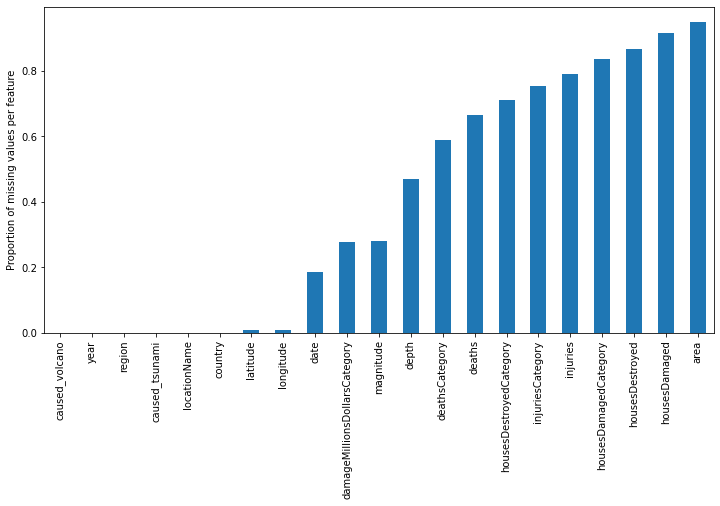

In [50]:
eq.isna().mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.ylabel('Proportion of missing values per feature')

In [51]:
# What dates are missing?
eq[eq['date'].isna()]

date  year                            region  \
id                                                   
40     NaT    17                       Middle East   
49     NaT    52                   Southern Europe   
58     NaT    79                   Southern Europe   
61     NaT    93                       Middle East   
66     NaT   138                         East Asia   
...    ...   ...                               ...   
9947   NaT  1255  S. and SE. Asia and Indian Ocean   
9969   NaT   120                       Middle East   
10066  NaT  1831         Central and South Pacific   
10078  NaT  1821                    Atlantic Ocean   
10484  NaT  1585                   Southern Europe   

                                            locationName       country area  \
id                                                                            
40     TURKEY:  IZMIR, EFES, AYDIN, MANISA, ALASEHIR,...        TURKEY  NaN   
49                        GREECE:  PHILIPPI,DRAMA,KAVALA        GREECE  NaN   
58                               ITALY:  NAPLES (NAPOLI)         ITALY  NaN   
61                                   TURKEY:  HELLESPONT        TURKEY  NaN   
66                                CHINA:  GANSU PROVINCE         CHINA  NaN   
...                                                  ...           ...  ...   
9947                                   NEPAL:  KATHMANDU         NEPAL  NaN   
9969                           TURKEY: NICOMEDIA, NICAEA        TURKEY  NaN   
10066           NEW ZEALAND:  NORTH ISLAND:  POVERTY BAY   NEW ZEALAND  NaN   
10078                           UNITED KINGDOM:  BRITIAN  UK TERRITORY  NaN   
10484                               GREECE:  MOUNT ATHOS        GREECE  NaN   

       latitude  longitude  magnitude  depth  ...  deathsCategory  injuries  \
id                                            ...                             
40       37.850     27.300        NaN    NaN  ...             NaN       NaN   
49       41.000     24.300        NaN    NaN  ...             NaN       NaN   
58       40.821     14.426        NaN    NaN  ...             NaN       NaN   
61       40.600     26.700        NaN    NaN  ...             3.0       NaN   
66       35.800    103.500        6.8    NaN  ...             3.0       NaN   
...         ...        ...        ...    ...  ...             ...       ...   
9947     27.700     85.300        NaN    NaN  ...             3.0       NaN   
9969     40.770     29.920        7.2    NaN  ...             3.0       NaN   
10066   -38.700    178.000        NaN    NaN  ...             NaN       NaN   
10078   -15.950     -5.700        NaN    NaN  ...             NaN       NaN   
10484    40.200     24.500        7.0    NaN  ...             1.0       NaN   

       injuriesCategory  housesDestroyed  housesDestroyedCategory  \
id                                                                  
40                  NaN              NaN                      NaN   
49                  NaN              NaN                      NaN   
58                  NaN              NaN                      NaN   
61                  NaN              NaN                      NaN   
66                  NaN              NaN                      3.0   
...                 ...              ...                      ...   
9947                NaN              NaN                      3.0   
9969                NaN              NaN                      3.0   
10066               NaN              NaN                      NaN   
10078               NaN              NaN                      NaN   
10484               NaN              NaN                      NaN   

       housesDamaged  housesDamagedCategory  damageMillionsDollarsCategory  \
id                                                                           
40               NaN                    NaN                            3.0   
49               NaN                    NaN                            3.0   
58               NaN                 

In [52]:
eq[eq['date'].isna()]['year'].describe()

count    1171.000000
mean     1250.855679
std       589.516146
min     -2150.000000
25%      1011.500000
50%      1493.000000
75%      1641.000000
max      1957.000000
Name: year, dtype: float64

In [53]:
eq[eq['year'].isna()]

Empty DataFrame
Columns: [date, year, region, locationName, country, area, latitude, longitude, magnitude, depth, deaths, deathsCategory, injuries, injuriesCategory, housesDestroyed, housesDestroyedCategory, housesDamaged, housesDamagedCategory, damageMillionsDollarsCategory, caused_tsunami, caused_volcano]
Index: []

[0 rows x 21 columns]

In [54]:
# On second thoughts, will likely gain more info from keeping year (inc. negative years) than dropping values that can't
# be converted to pd.datetime objects. So drop 'date' and keep 'year'.
eq.drop('date', axis=1, inplace=True)

In [55]:
# What about 'area'? This represents the US county code
eq[eq['area'].notnull()]

year                     region  \
id                                       
1693   1825  Central and South Pacific   
2419   1892  Central and South Pacific   
2533   1898   North America and Hawaii   
2554   1899   North America and Hawaii   
2606   1902   North America and Hawaii   
...     ...                        ...   
9954   1700   North America and Hawaii   
10036  2013   North America and Hawaii   
10157  2015   North America and Hawaii   
10300  2018   North America and Hawaii   
10470  1909   North America and Hawaii   

                                           locationName        country area  \
id                                                                            
1693   GUAM; NORTHERN MARIANA ISLANDS:  LADRONES ISLAND  USA TERRITORY   GU   
2419                                               GUAM  USA TERRITORY   GU   
2533              CALIFORNIA:  N COAST,MENDOCINO COUNTY            USA   CA   
2554                             ALASKA:  CAPE YAKATAGA            USA   AK   
2606            ALASKA:  ALEUTIAN ISLANDS:  FOX ISLANDS            USA   AK   
...                                                 ...            ...  ...   
9954                           CASCADIA SUBDUCTION ZONE            USA   OR   
10036                                      TEXAS:  WEST            USA   TX   
10157                                            ALASKA            USA   AK   
10300                            ALASKA:  KODIAK ISLAND            USA   AK   
10470                                              UTAH            USA   UT   

       latitude  longitude  magnitude  depth  deaths  deathsCategory  \
id                                                                     
1693     14.000    143.300        NaN    NaN     NaN             NaN   
2419     14.000    143.300        7.5    NaN     NaN             NaN   
2533     39.000   -124.000        NaN    NaN     NaN             NaN   
2554     60.000   -140.000        7.8   25.0     NaN             NaN   
2606     52.400   -167.500        7.8    NaN     NaN             NaN   
...         ...        ...        ...    ...     ...             ...   
9954     45.000   -125.000        9.0    NaN     NaN             NaN   
10036    31.817    -97.088        2.1    0.0    14.0             1.0   
10157    52.214   -169.399        6.9   23.0     NaN             NaN   
10300    56.004   -149.166        7.9   14.0     NaN             NaN   
10470    41.800   -112.700        NaN    NaN     NaN             NaN   

       injuries  injuriesCategory  housesDestroyed  housesDestroyedCategory  \
id                                                                            
1693        NaN               NaN              NaN                      3.0   
2419        NaN               NaN              NaN                      1.0   
2533        NaN               NaN              NaN                      NaN   
2554        NaN               NaN              NaN                      NaN   
2606        NaN               NaN              NaN                      NaN   
...         ...               ...              ...                      ...   
9954        NaN               NaN              NaN                      NaN   
10036     200.0               3.0             50.0                      1.0   
10157       NaN               NaN              NaN                      NaN   
10300       NaN               NaN              NaN                      NaN   
10470       NaN               NaN              NaN                      NaN   

       housesDamaged  housesDamagedCategory  damageMillionsDollarsCategory  \
id                                                                           
1693             NaN                    NaN                            2.0   
2419             NaN                    NaN                            2.0   
2533             NaN                    NaN                            1.0   
2554             NaN                    NaN                            NaN   

In [56]:
# We already have this information in 'locationName' and latitude/longitude so drop
eq.drop('area', axis=1, inplace=True)

In [57]:
eq

year                     region  \
id                                       
40       17                Middle East   
49       52            Southern Europe   
58       79            Southern Europe   
61       93                Middle East   
66      138                  East Asia   
...     ...                        ...   
10613  1959  Central Asia and Caucasus   
10617  2022              South America   
10619  1875            Southern Europe   
10624  1823            Southern Europe   
10627  2022                  East Asia   

                                            locationName  country  latitude  \
id                                                                            
40     TURKEY:  IZMIR, EFES, AYDIN, MANISA, ALASEHIR,...   TURKEY    37.850   
49                        GREECE:  PHILIPPI,DRAMA,KAVALA   GREECE    41.000   
58                               ITALY:  NAPLES (NAPOLI)    ITALY    40.821   
61                                   TURKEY:  HELLESPONT   TURKEY    40.600   
66                                CHINA:  GANSU PROVINCE    CHINA    35.800   
...                                                  ...      ...       ...   
10613                       RUSSIA: LAKE BAYKAL (BAIKAL)   RUSSIA    52.000   
10617                         PERU: LIMA, CALLAO, CHILCA     PERU   -12.360   
10619                  ITALY: RIMINI, CERVIA, CESENATICO    ITALY    44.200   
10624                    BALKANS NW:  BOSNIA-HERZEGOVINA  CROATIA       NaN   
10627                            CHINA: SICHUAN PROVINCE    CHINA    30.416   

       longitude  magnitude  depth  deaths  deathsCategory  injuries  \
id                                                                     
40        27.300        NaN    NaN     NaN             NaN       NaN   
49        24.300        NaN    NaN     NaN             NaN       NaN   
58        14.426        NaN    NaN     NaN             NaN       NaN   
61        26.700        NaN    NaN     NaN             3.0       NaN   
66       103.500        6.8    NaN     NaN             3.0       NaN   
...          ...        ...    ...     ...             ...       ...   
10613    106.500        6.5    NaN     NaN             NaN       NaN   
10617    -76.890        5.4   55.0     2.0             1.0      11.0   
10619     12.400        NaN    NaN     NaN             NaN       NaN   
10624        NaN        NaN    NaN     NaN             NaN       NaN   
10627    102.989        5.9   10.0     4.0             1.0      14.0   

       injuriesCategory  housesDestroyed  housesDestroyedCategory  \
id                                                                  
40                  NaN              NaN                      NaN   
49                  NaN              NaN                      NaN   
58                  NaN              NaN                      NaN   
61                  NaN              NaN                      NaN   
66                  NaN              NaN                      3.0   
...                 ...              ...                      ...   
10613               NaN              NaN                      NaN   
10617               1.0              4.0                      1.0   
10619               NaN              NaN                      NaN   
10624               NaN              NaN                      NaN   
10627               1.0              NaN                      NaN   

       housesDamaged  housesDamagedCategory  damageMillionsDollarsCategory  \
id                                                                           
40               NaN                    NaN                            3.0   
49               NaN                    NaN                            3.0   
58               NaN                    NaN                            NaN   
61               NaN                    NaN                            3.0   
66               NaN                    NaN                            3.0   
...              ...                    ...        

Text(0, 0.5, 'Proportion of missing values per feature')

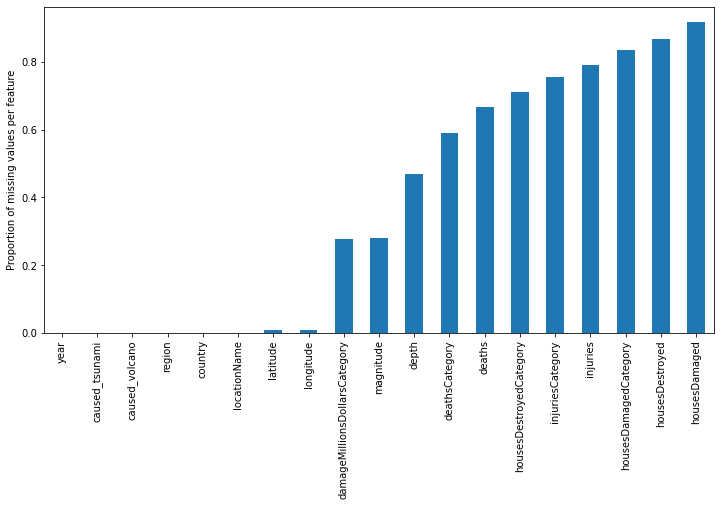

In [58]:
eq.isna().mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.ylabel('Proportion of missing values per feature')

In [59]:
# Realistically, too much missing data in below columns so drop
eq.drop(['housesDamaged', 'housesDestroyed', 'housesDamagedCategory', 'injuries', 'injuriesCategory', 'housesDestroyedCategory'],
       axis=1, inplace=True)

In [60]:
eq

year                     region  \
id                                       
40       17                Middle East   
49       52            Southern Europe   
58       79            Southern Europe   
61       93                Middle East   
66      138                  East Asia   
...     ...                        ...   
10613  1959  Central Asia and Caucasus   
10617  2022              South America   
10619  1875            Southern Europe   
10624  1823            Southern Europe   
10627  2022                  East Asia   

                                            locationName  country  latitude  \
id                                                                            
40     TURKEY:  IZMIR, EFES, AYDIN, MANISA, ALASEHIR,...   TURKEY    37.850   
49                        GREECE:  PHILIPPI,DRAMA,KAVALA   GREECE    41.000   
58                               ITALY:  NAPLES (NAPOLI)    ITALY    40.821   
61                                   TURKEY:  HELLESPONT   TURKEY    40.600   
66                                CHINA:  GANSU PROVINCE    CHINA    35.800   
...                                                  ...      ...       ...   
10613                       RUSSIA: LAKE BAYKAL (BAIKAL)   RUSSIA    52.000   
10617                         PERU: LIMA, CALLAO, CHILCA     PERU   -12.360   
10619                  ITALY: RIMINI, CERVIA, CESENATICO    ITALY    44.200   
10624                    BALKANS NW:  BOSNIA-HERZEGOVINA  CROATIA       NaN   
10627                            CHINA: SICHUAN PROVINCE    CHINA    30.416   

       longitude  magnitude  depth  deaths  deathsCategory  \
id                                                           
40        27.300        NaN    NaN     NaN             NaN   
49        24.300        NaN    NaN     NaN             NaN   
58        14.426        NaN    NaN     NaN             NaN   
61        26.700        NaN    NaN     NaN             3.0   
66       103.500        6.8    NaN     NaN             3.0   
...          ...        ...    ...     ...             ...   
10613    106.500        6.5    NaN     NaN             NaN   
10617    -76.890        5.4   55.0     2.0             1.0   
10619     12.400        NaN    NaN     NaN             NaN   
10624        NaN        NaN    NaN     NaN             NaN   
10627    102.989        5.9   10.0     4.0             1.0   

       damageMillionsDollarsCategory  caused_tsunami  caused_volcano  
id                                                                    
40                               3.0               0               0  
49                               3.0               0               0  
58                               NaN               1               1  
61                               3.0               0               0  
66                               3.0               0               0  
...                              ...             ...             ...  
10613                            NaN               1               0  
10617                            1.0               0               0  
10619                            2.0               1               0  
10624                            2.0               1               0  
10627                            2.0               0               0  

[6320 rows x 13 columns]

<AxesSubplot:>

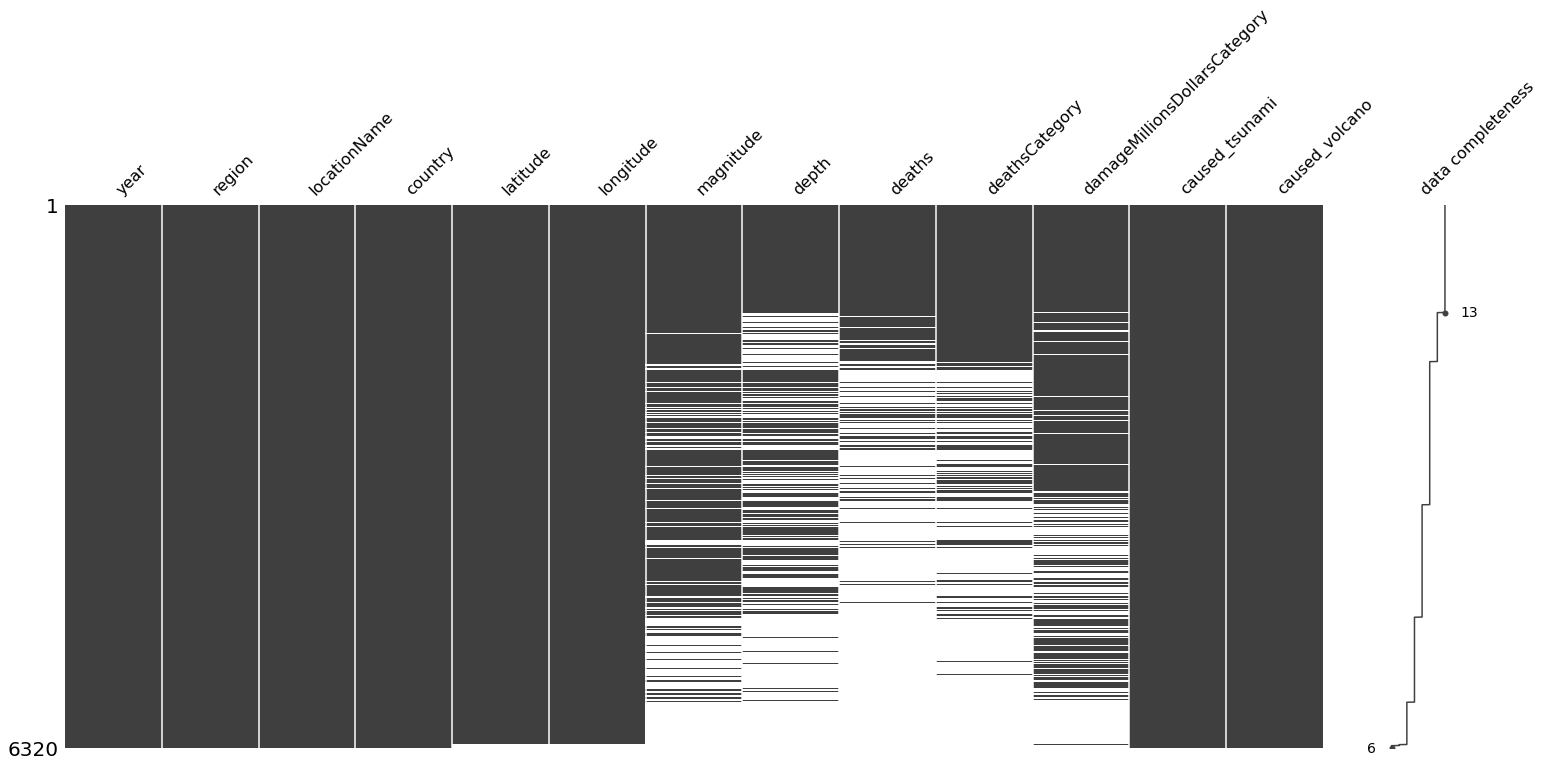

In [61]:
msno.matrix(eq, labels=True, sort='descending')

<AxesSubplot:ylabel='Frequency'>

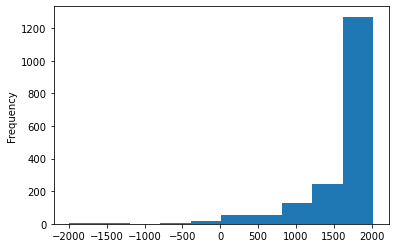

In [62]:
eq[eq['magnitude'].isnull()]['year'].plot(kind='hist')

In [63]:
# Drop entries where magnitude is missing, likely to be an important feature!
eq.drop(eq[eq['magnitude'].isnull()].index, inplace=True)

<AxesSubplot:>

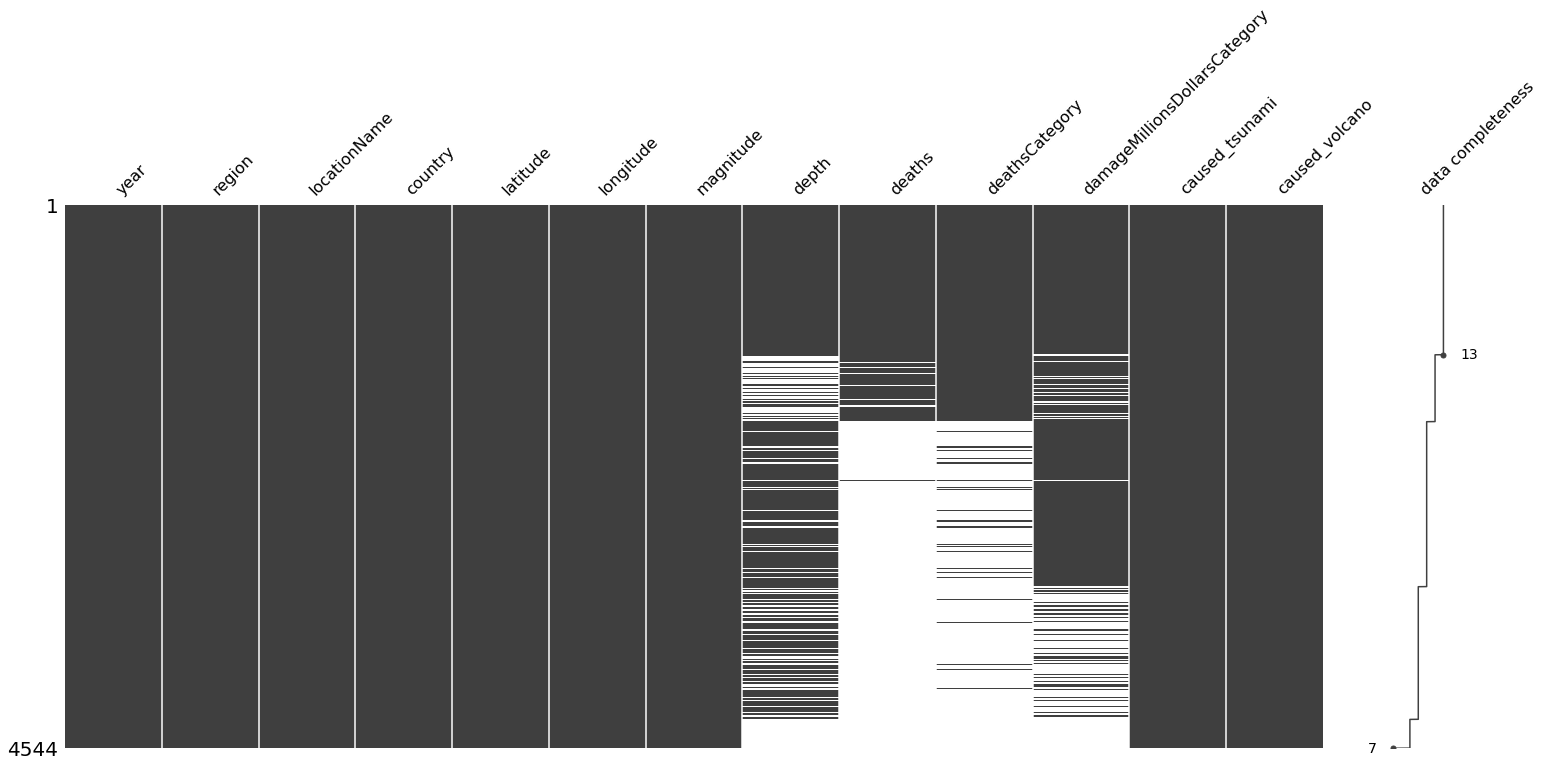

In [64]:
msno.matrix(eq, labels=True, sort='descending')

Text(0, 0.5, 'depth')

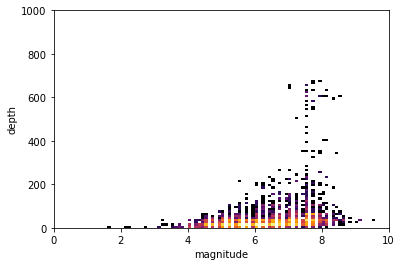

In [65]:
# Can the depth column missing values be filled based on the magnitude of the earthquake?
plt.hist2d(eq['magnitude'], eq['depth'], range=[[0,10],[0,1000]], bins=100, cmap='inferno', norm=colors.LogNorm())#, s=2)
plt.xlabel('magnitude')
plt.ylabel('depth')

In [66]:
# Although deeper earthquakes tend to be larger in magnitude, unlikely to be able to predict the shallower earthquakes well

<AxesSubplot:xlabel='caused_tsunami', ylabel='depth'>

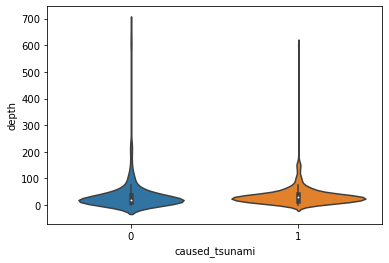

In [67]:
# Does whether a tsunami/volcano occured help predict depth?
sns.violinplot(data=eq, x='caused_tsunami', y='depth')

<AxesSubplot:xlabel='caused_volcano', ylabel='depth'>

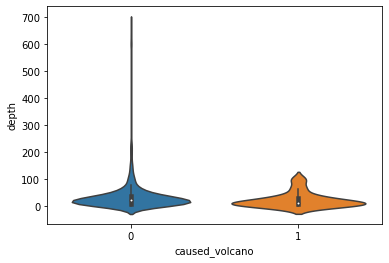

In [68]:
sns.violinplot(data=eq, x='caused_volcano', y='depth')

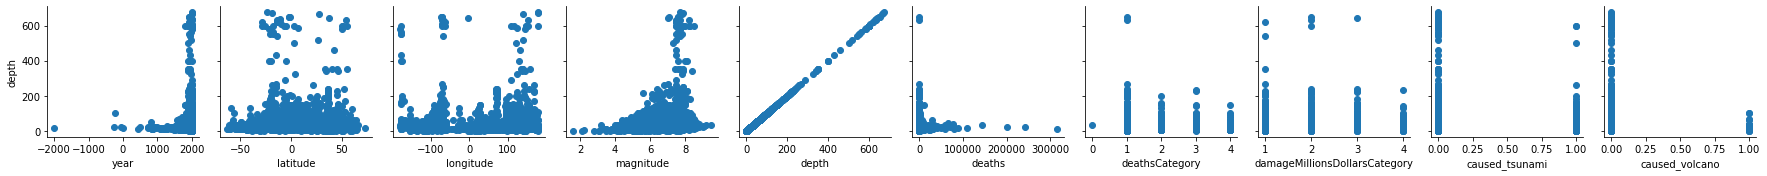

In [69]:
g = sns.PairGrid(eq, y_vars='depth')    
g = g.map(plt.scatter)

In [70]:
# No obvious variable that could be used to predict depth (some apparently strange features here, to be looked at later)
# Drop entries with depth missing
eq.drop(eq[eq['depth'].isnull()].index, inplace=True)

<AxesSubplot:>

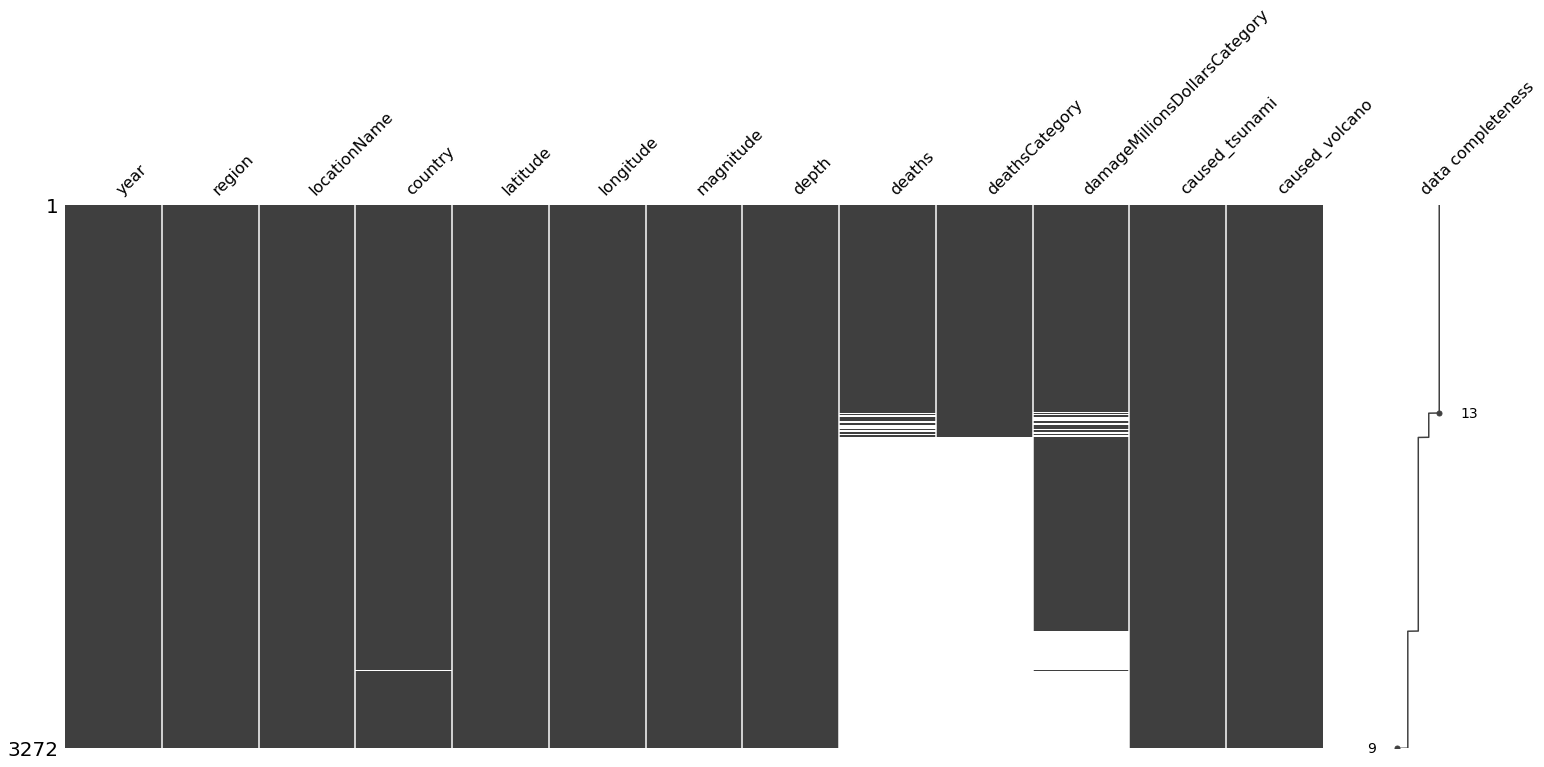

In [71]:
msno.matrix(eq, labels=True, sort='descending')

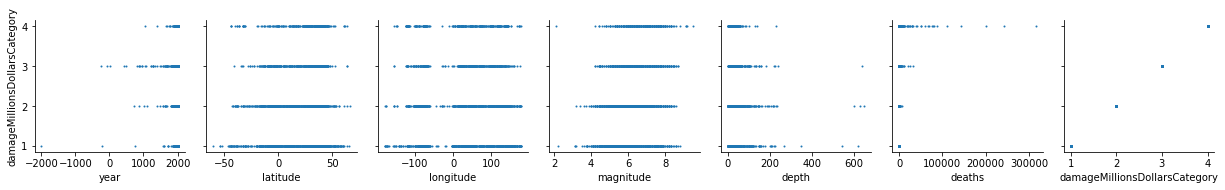

In [72]:
# Finally, what about the damageMillionsDollarsCategory?
g = sns.PairGrid(eq[['year', 'latitude', 'longitude', 'magnitude', 'depth', 'deaths', 'damageMillionsDollarsCategory']],
                 y_vars='damageMillionsDollarsCategory')
#g = g.map(plt.hist2d, norm=colors.LogNorm())#, s=2)
g = g.map(plt.scatter, s=1)

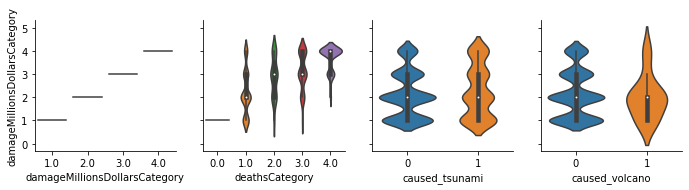

In [73]:
g = sns.PairGrid(eq[['damageMillionsDollarsCategory', 'deathsCategory', 'caused_tsunami', 'caused_volcano']],
                 y_vars='damageMillionsDollarsCategory')
g = g.map(sns.violinplot)

Text(0, 0.5, 'damageMillionsDollarsCategory')

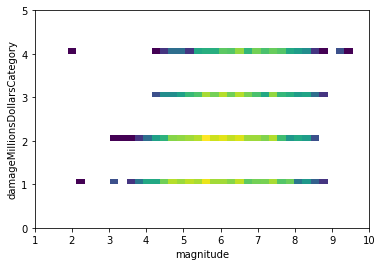

In [74]:
temp = plt.hist2d(eq['magnitude'], eq['damageMillionsDollarsCategory'], range=[[1,10],[0,5]], bins=40, norm=colors.LogNorm())
plt.xlabel('magnitude')
plt.ylabel('damageMillionsDollarsCategory')

In [75]:
# No easy way to fill the missing info from damageMillionsDollarsCategory. Drop missing entries
eq.drop(eq[eq['damageMillionsDollarsCategory'].isnull()].index, inplace=True)

<AxesSubplot:>

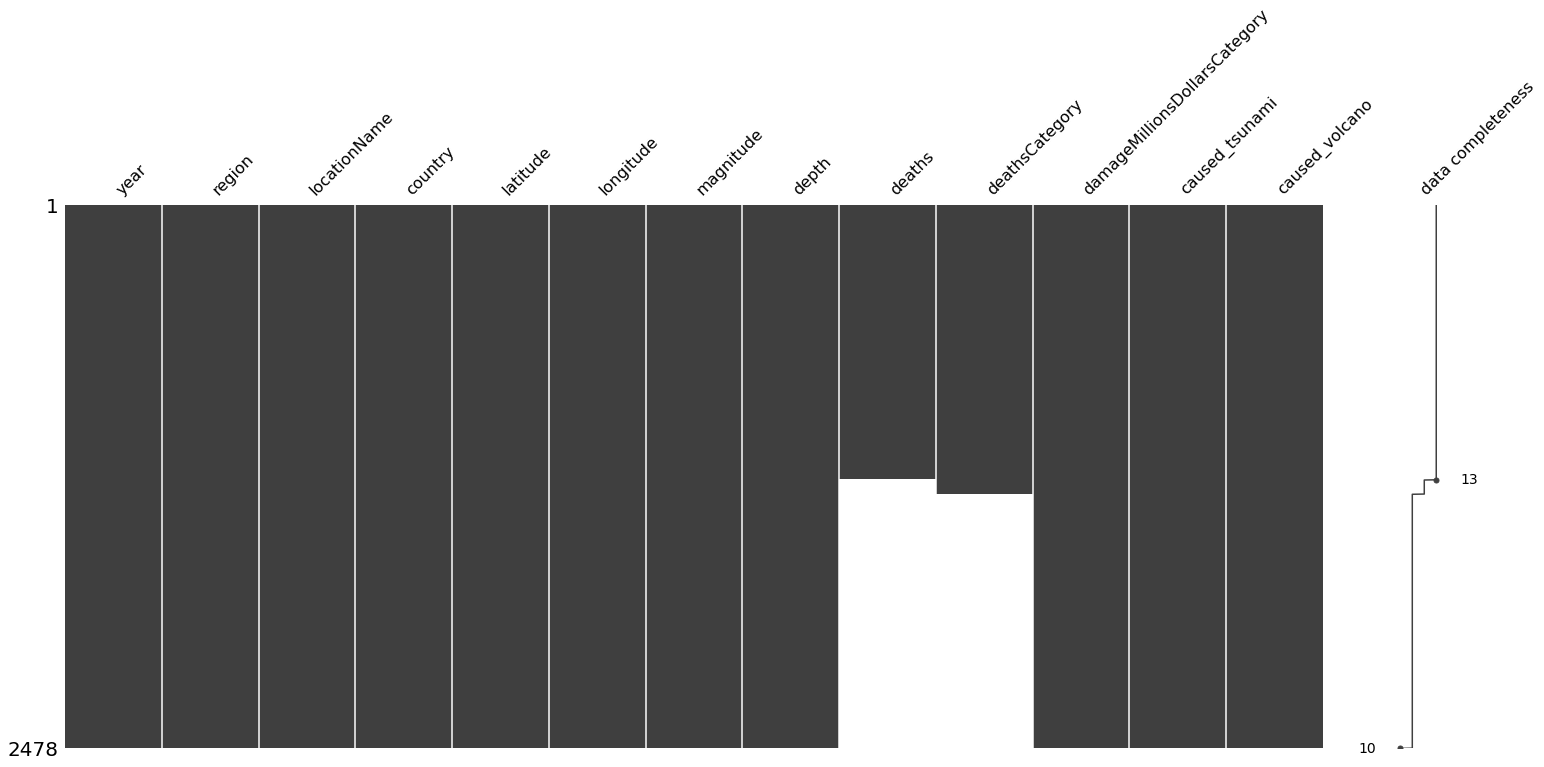

In [76]:
msno.matrix(eq, labels=True, sort='descending')

In [77]:
# Aiming to predict deaths so don't need to worry about missing data there (yet)

## Content

In [78]:
#sns.pairplot(eq)

<AxesSubplot:xlabel='year', ylabel='Count'>

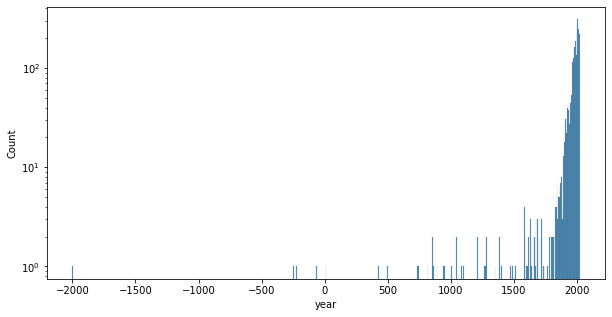

In [79]:
# Majority of recorded earthquakes were from ~1800 onwards
plt.figure(figsize=(10,5))
sns.histplot(data=eq, x='year', log_scale=(False,True))

In [80]:
# Location of each earthquake (colour=magnitude).
# As expected, they tend to lie along tectonic plates.
# Lack of recorded earthquakes around the Atlantic Ocean result in gaps in the data around longitude~-50 (see pairplot)
fig = px.scatter_geo(eq, lat='latitude', lon='longitude', hover_name='year', color='magnitude')
fig.update_layout(title='Earthquakes', title_x=0.5)
fig.update_traces(marker=dict(size=2))
fig.show()

In [81]:
# Earthquakes earlier than the year 1500 seem to be focussed around one region (central/western Asia)
fig = px.scatter_geo(eq[eq['year']<1500], lat='latitude', lon='longitude', hover_name='year', color='magnitude')
fig.update_layout(title='Earthquakes', title_x=0.5)
fig.update_traces(marker=dict(size=5))
fig.show()

In [82]:
# How many earthquakes are there per country? N.B. Need to combined USA and USA TERRITORY to obtain correct map below
eq['country'].replace('USA TERRITORY','USA').value_counts()

CHINA                                   237
INDONESIA                               214
IRAN                                    202
USA                                     131
JAPAN                                   119
                                       ... 
SWITZERLAND                               1
WALLIS AND FUTUNA (FRENCH TERRITORY)      1
LEBANON                                   1
BELGIUM                                   1
KENYA                                     1
Name: country, Length: 123, dtype: int64

In [83]:
fig = px.choropleth(locationmode='country names',
                    locations=eq['country'].replace('USA TERRITORY','USA').value_counts().rename(index={'USA': 'UNITED STATES'}).index,
                    color=eq['country'].replace('USA TERRITORY','USA').value_counts(),
                    color_continuous_scale=px.colors.sequential.Plasma,
                    hover_name=eq['country'].replace('USA TERRITORY','USA').value_counts().index
                   )
fig.show()

<AxesSubplot:xlabel='magnitude', ylabel='Count'>

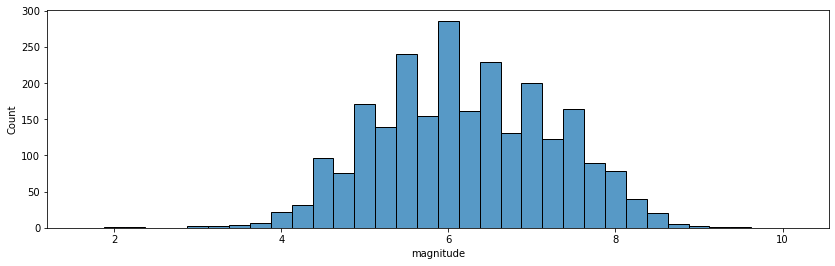

In [84]:
# Magnitude recordings in multiples of 0.5 most common. Approx. 6 is the most common magnitude.
plt.figure(figsize=(14,4))
sns.histplot(data=eq, x='magnitude', binwidth=0.25, binrange=(1.625,10))

<AxesSubplot:xlabel='damageMillionsDollarsCategory', ylabel='magnitude'>

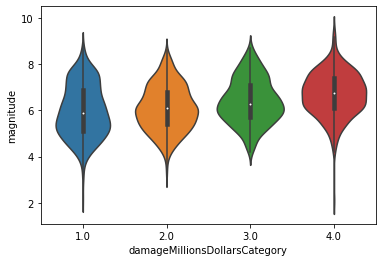

In [85]:
# Larger magnitude tends to lead to more damage, as expected
sns.violinplot(data=eq, x='damageMillionsDollarsCategory', y='magnitude')

<AxesSubplot:xlabel='depth', ylabel='Count'>

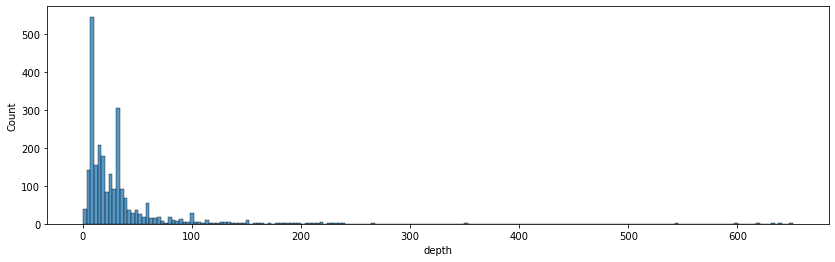

In [86]:
# Majority of earthquakes occur <100km from Earths surface
plt.figure(figsize=(14,4))
sns.histplot(data=eq, x='depth')

<AxesSubplot:xlabel='year', ylabel='depth'>

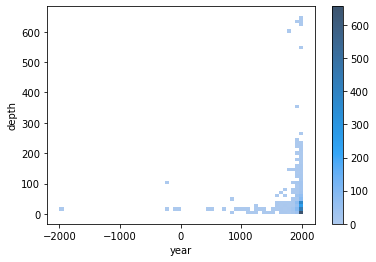

In [87]:
# Most earthquakes at shallow depths (which a quick Google confirms is the case)
sns.histplot(data=eq, x='year', y='depth', bins=60, cbar=True)

<AxesSubplot:xlabel='magnitude', ylabel='depth'>

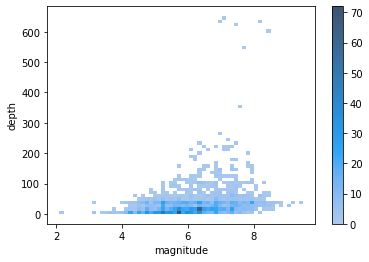

In [88]:
# Deeper earthquakes tend to be higher in magnitude
sns.histplot(data=eq, x='magnitude', y='depth', bins=60, cbar=True)

<AxesSubplot:xlabel='damageMillionsDollarsCategory', ylabel='depth'>

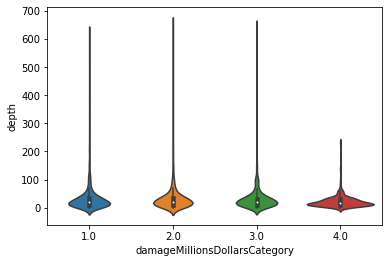

In [89]:
# No obvious relation between depth and damage
sns.violinplot(data=eq, x='damageMillionsDollarsCategory', y='depth')

<AxesSubplot:xlabel='damageMillionsDollarsCategory', ylabel='count'>

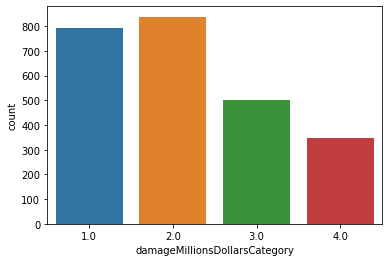

In [90]:
sns.countplot(data=eq, x='damageMillionsDollarsCategory')

In [91]:
# Earthquakes leading to tsunamis tend to occur in coastal/oceanic areas, as expected
fig = px.scatter_geo(eq, lat='latitude', lon='longitude', hover_name='year', color='caused_tsunami')
fig.update_layout(title='Earthquakes causing tsunamis', title_x=0.5)
fig.update_traces(marker=dict(size=5))
fig.show()

In [92]:
eq.columns

Index(['year', 'region', 'locationName', 'country', 'latitude', 'longitude',
       'magnitude', 'depth', 'deaths', 'deathsCategory',
       'damageMillionsDollarsCategory', 'caused_tsunami', 'caused_volcano'],
      dtype='object')

In [93]:
# Location of volcanoes can be seen (e.g. Mount Vesuvius in Italy, Hawaii islands...)
# Yellow markers made larger so they can be seen
fig = px.scatter_geo(eq, lat='latitude', lon='longitude', hover_name='locationName', color='caused_volcano')
fig.update_layout(title='Earthquakes causing volcanoes', title_x=0.5)
fig.update_traces(marker=dict(size=(eq['caused_volcano']+1)*5))
fig.show()

In [94]:
# Only 17 earthquakes in the dataset caused volcanoes
eq['caused_volcano'].value_counts()

0    2461
1      17
Name: caused_volcano, dtype: int64

<AxesSubplot:>

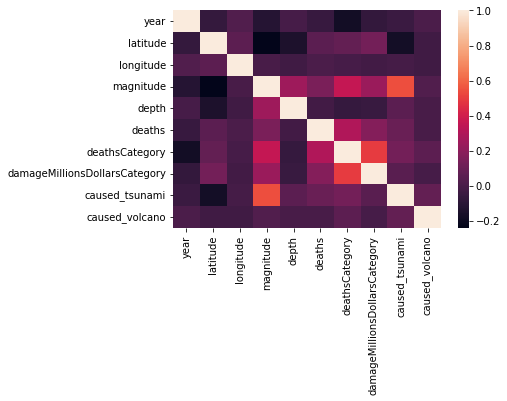

In [95]:
# Which data are correlated?
sns.heatmap(eq.corr())

In [96]:
# As demonstrated in earlier portion of EDA, magnitude is correlated with a lot of other features
# e.g. deaths, damage.
# Interestingly, but as expected, magnitude is highly correlated with whether a tsunami occured or not.
# Damage is slightly correlated with deaths.

### Target variable

<AxesSubplot:xlabel='deaths', ylabel='Count'>

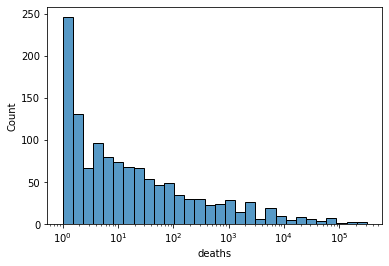

In [97]:
# Very few deaths in most earthquakes
sns.histplot(data=eq, x='deaths', bins=30, log_scale=True)

<AxesSubplot:xlabel='depth', ylabel='deaths'>

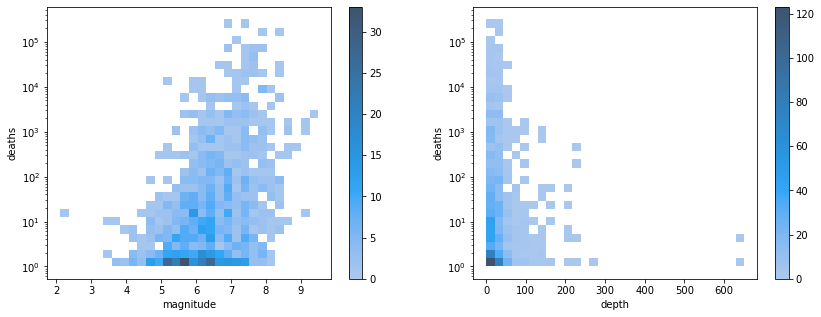

In [98]:
# Number of deaths tends to increase as magnitude increases
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(data=eq, y='deaths', x='magnitude', bins=30, log_scale=(False,True), cbar=True, ax=ax[0])
sns.histplot(data=eq, y='deaths', x='depth', bins=30, log_scale=(False,True), cbar=True, ax=ax[1])

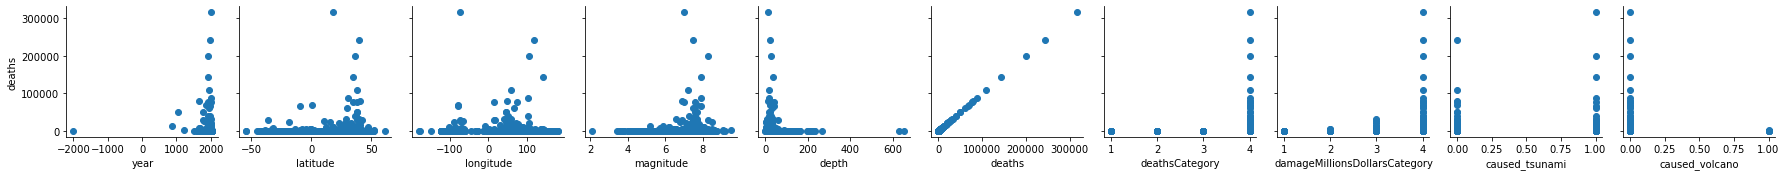

In [99]:
g = sns.PairGrid(eq, y_vars='deaths')
g = g.map(plt.scatter)

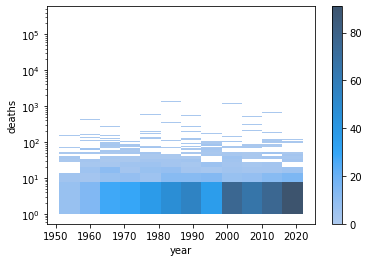

In [100]:
# More deaths as years go on? Simply just more/better recorded (only done most recent years due to lack of non-modern data)
sns.histplot(data=eq[eq['year']>1950], x='year', y='deaths',cbar=True)
plt.yscale('log')

<AxesSubplot:xlabel='deaths', ylabel='Count'>

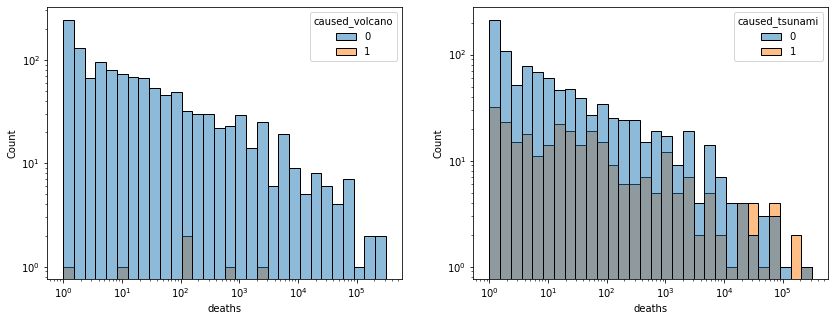

In [101]:
# Not enough data to judge whether volcano eruptions cause more deaths.
# Deaths follows similar trend for whether tsunami occurs or not.
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(data=eq, x='deaths', bins=30, log_scale=(True,True), hue='caused_volcano', ax=ax[0])
sns.histplot(data=eq, x='deaths', bins=30, log_scale=(True,True), hue='caused_tsunami', ax=ax[1])

In [102]:
eq.columns

Index(['year', 'region', 'locationName', 'country', 'latitude', 'longitude',
       'magnitude', 'depth', 'deaths', 'deathsCategory',
       'damageMillionsDollarsCategory', 'caused_tsunami', 'caused_volcano'],
      dtype='object')

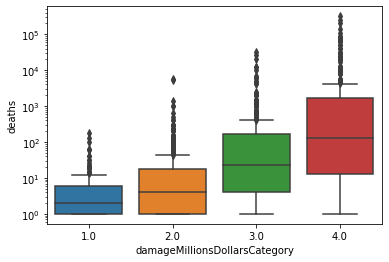

In [103]:
# As one would expect, more damage tends to lead to more deaths
sns.boxplot(data=eq, x='damageMillionsDollarsCategory', y='deaths')
plt.yscale('log')

In [104]:
people

id                       description
0  0                              None
1  1             Few (~1 to 50 people)
2  2          Some (~51 to 100 people)
3  3        Many (~101 to 1000 people)
4  4  Very Many (~1001 or more people)

<AxesSubplot:xlabel='deathsCategory', ylabel='count'>

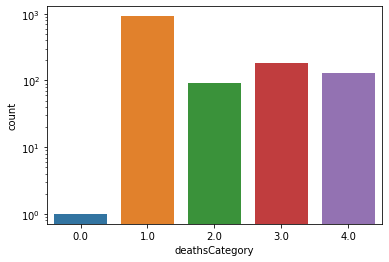

In [105]:
# Most earthquakes caused 1-50 deaths. Only 1 had zero deaths.
sns.countplot(data=eq, x='deathsCategory', log=True)

In [106]:
eq.head()

year                     region                  locationName  \
id                                                                   
122   500  Central Asia and Caucasus                    KAZAKHSTAN   
276   942  Central Asia and Caucasus          UZBEKISTAN:  BUKHARA   
464  1267                Middle East  IRAN:  NEYSHABUR (NEISHABUR)   
472  1275  Central Asia and Caucasus                       GEORGIA   
481  1281                Middle East              IRAN:  SHADIYAKH   

        country  latitude  longitude  magnitude  depth  deaths  \
id                                                               
122  KAZAKHSTAN      42.7       76.5        6.7   20.0     NaN   
276  UZBEKISTAN      39.7       64.5        6.7   20.0     NaN   
464        IRAN      36.0       58.8        5.8   10.0     NaN   
472     GEORGIA      42.1       44.2        6.7   28.0     NaN   
481        IRAN      36.1       58.8        5.8   10.0     NaN   

     deathsCategory  damageMillionsDollarsCategory  caused_tsunami  \
id                                                                   
122             NaN                            3.0               0   
276             NaN                            3.0               0   
464             NaN                            3.0               0   
472             3.0                            3.0               0   
481             NaN                            3.0               0   

     caused_volcano  
id                   
122               0  
276               0  
464               0  
472               0  
481               0

## Feature engineering

A useful feature to have would be the population density around the region of the earthquake. Ideally we would have this as a function of:
- The latitude/longitude of the earthquake
- The year that the earthquake occured

This data is available from the EU Global Human Settlement Layer (GHSL) project (full citation below): https://ghsl.jrc.ec.europa.eu/ghs_pop2019.php

The data I'm interested in is the population density measured in square tiles across the earth, each 30 arcseconds of latitude/longitude across (1 arcsecond = 1/3600 degrees which is approx. 30m on the Earths surface). Higher resolution is available but is not possible or suitable, as will be shown below.

The data was measured at four points in time: 1975, 1990, 2000, 2015. However, due to the very high resolution of the dataset, the file sizes are large and my local machine does not have the hardware capabilities to handle them all. I will hence be assuming that the population density is constant over time and will be using the most recent years (2015) data only.

**Full dataset citation**

Dataset:

Schiavina, Marcello; Freire, Sergio; MacManus, Kytt (2019): GHS population grid multitemporal (1975, 1990, 2000, 2015) R2019A. European Commission, Joint Research Centre (JRC) DOI: 10.2905/42E8BE89-54FF-464E-BE7B-BF9E64DA5218 PID: http://data.europa.eu/89h/0c6b9751-a71f-4062-830b-43c9f432370f

Concept & Methodology:

Freire, Sergio; MacManus, Kytt; Pesaresi, Martino; Doxsey-Whitfield, Erin; Mills, Jane (2016): Development of new open and free multi-temporal global population grids at 250 m resolution. Geospatial Data in a Changing World; Association of Geographic Information Laboratories in Europe (AGILE). AGILE 2016. 

<AxesSubplot:xlabel='year', ylabel='Count'>

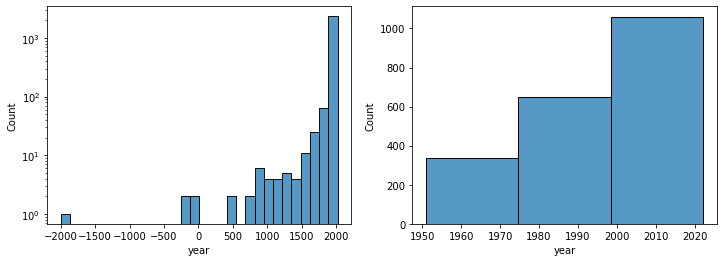

In [107]:
# Below plots show why 2015 dataset was chosen - majority of recorded earthquakes are in recent years.
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=eq, x='year', bins=30, cbar=True, log_scale=(False,True), ax=ax[0])
sns.histplot(data=eq[eq['year']>1950], x='year', bins=3, cbar=True, ax=ax[1])

In [108]:
# GHSL dataset is in the form of a .tif file
from tifffile import tifffile

In [109]:
# Data read into numpy array. Each element represents a tile on the earths surface.
pop_density = tifffile.imread('data/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.tif')

In [110]:
pop_density.shape

(21600, 43200)

In [111]:
360/pop_density.shape[1] # 43200 tiles around the earths circumference (360 degrees), each equal to 30arcseconds

0.008333333333333333

In [112]:
30/3600 # 30 arcseconds in degrees (equal to above)

0.008333333333333333

In [113]:
pop_density.min()

-200.0

In [114]:
# Tiles with missing population density have entry set to -200.
# From GHSL website (https://ghsl.jrc.ec.europa.eu/download.php?ds=pop), missing tiles are all in the sea.
# Hence safe to assume that these can be approximated to have zero population density.
pop_density[pop_density==-200] = 0 # Replace -200 with zero

In [115]:
pop_density.min()

0.0

In [116]:
pop_density.max()

459434.619140625

As mentioned above, dataset is very high resolution (each tile is ~1km across). This is unsuitable for analysis of earthquakes because the effects are felt across O(10 - 100 km) rather than O(1km). Hence reshape the dataset by combining neighbouring tiles.

Tiles will now be ~10km (300 arcseconds) across.

In [117]:
H,W = 2160,4320 # block-size (10km per tile)
#H,W = 216,432 # block-size ()
#H,W = 108,216 # block-size (180km per tile)
#H,W = 54,108 # block-size
#H,W = 27,54 # block-size (720km per tile)
#H,W = 108, 216
m,n = pop_density.shape
low_res_pop_density = pop_density.reshape(H,m//H,W,n//W).sum(axis=(1,3))

In [118]:
# Delete original pop_density array to free up memory
import gc
del pop_density
gc.collect()

4688

In [119]:
low_res_pop_density.shape

(2160, 4320)

Text(33.0, 0.5, 'Tile index (latitude)')

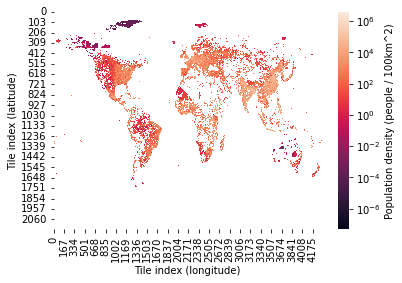

In [120]:
sns.heatmap(low_res_pop_density, norm=colors.LogNorm(), cbar_kws={'label': 'Population density (people / 100km^2)'})
plt.xlabel('Tile index (longitude)')
plt.ylabel('Tile index (latitude)')

Text(0, 0.5, 'Population density (summed over longitude)')

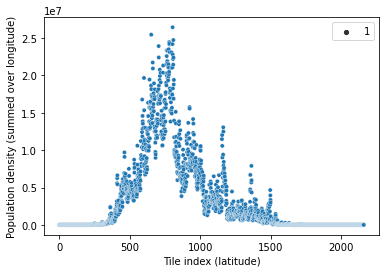

In [121]:
# Most of the population is in the northern hemisphere, as expected
sns.scatterplot(x=range(0,low_res_pop_density.shape[0]), y=low_res_pop_density.sum(axis=1), size=1)
plt.xlabel('Tile index (latitude)')
plt.ylabel('Population density (summed over longitude)')

Text(0, 0.5, 'Population density (summed over latitude)')

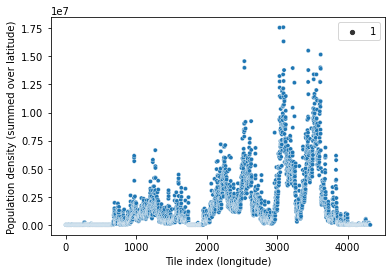

In [122]:
# Major spikes from USA, Europe, India and China
sns.scatterplot(x=range(0,low_res_pop_density.shape[1]), y=low_res_pop_density.sum(axis=0), size=1)
plt.xlabel('Tile index (longitude)')
plt.ylabel('Population density (summed over latitude)')

Now that we have the population density, we need to match each earthquake to a tile on the earths surface using the latitude/longitude.

In [123]:
n_long_tiles = low_res_pop_density.shape[1] # Number of tiles along longitudinal direction
n_lat_tiles = low_res_pop_density.shape[0] # Number of tiles along latitudinal (is that a word?) direction

In [124]:
# Find tile boundaries in longitudinal direction (-180 degrees to 180 degrees according to documentation)
long_tile_boundaries = np.array([-180])
for i in range(1,n_long_tiles):
    long_tile_boundaries = np.append(long_tile_boundaries, long_tile_boundaries[i-1] + (360/n_long_tiles))
long_tile_boundaries = np.append(long_tile_boundaries, 180)
long_tile_boundaries

array([-180.        , -179.91666667, -179.83333333, ...,  179.83333333,
        179.91666667,  180.        ])

In [125]:
# Do the same in the latitudinal direction (-56.37 degrees to 83.63 degrees according to documentation)
#lat_tile_boundaries = np.array([-56.37])
lat_tile_boundaries = np.array([83.63])
for i in range(1,n_lat_tiles):
    #lat_tile_boundaries = np.append(lat_tile_boundaries, lat_tile_boundaries[i-1] + ((83.63--56.37)/n_lat_tiles))
    lat_tile_boundaries = np.append(lat_tile_boundaries, lat_tile_boundaries[i-1] - ((83.63--56.37)/n_lat_tiles))
#lat_tile_boundaries = np.append(lat_tile_boundaries, 83.63)
lat_tile_boundaries = np.append(lat_tile_boundaries, -56.37)
lat_tile_boundaries

array([ 83.63      ,  83.56518519,  83.50037037, ..., -56.24037037,
       -56.30518519, -56.37      ])

(-1.0, 2.0)

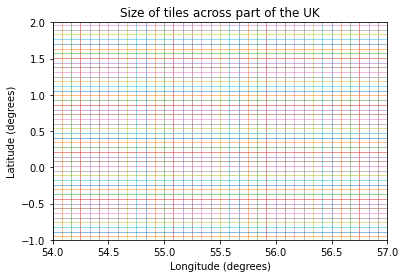

In [126]:
# Draw some of the tile boundaries (area chosen = small part of UK) - used to test code later.
for b in np.nditer(long_tile_boundaries[(long_tile_boundaries>54) & (long_tile_boundaries<57)]):
    plt.plot([b,b],[-56.37,83.63], linewidth=0.5)
for b in np.nditer(lat_tile_boundaries[(lat_tile_boundaries>-1) & (lat_tile_boundaries<2)]):
    plt.plot([-180,180], [b,b], linewidth=0.5)

plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.title('Size of tiles across part of the UK')
plt.xlim([54,57])
plt.ylim([-1,2])

As I have discrete tiles in the population density dataset but we have continuous longitude/latitude coordinates for each earthquake, I need to find which tile each earthquake occured in.

This is almost a nearest neighbour problem except I need to make sure the earthquake position is greater than the nearest tile boundary and if not, use the previous tile. This makes sure the earthquake location is placed in the correct tile.

Due to this condition, a KDTree won't work and a custom function is needed.

In [127]:
def find_index_of_nearest_boundary(pos, boundary_array):
    """
    Given a position (either longitude or latitude), find the population density tile (on earths surface) it lies within.
    """
    distance = abs(boundary_array-pos) # absolute distance from all tile boundaries to position
    idx = np.where(distance==distance.min()) # index of tile with minimum distance to position
    if pos-boundary_array[idx[0][0]] < 0:
        idx[0][0] -= 1 # pos is to the left of/above boundary so go to previous tile
    return idx[0][0]

In [128]:
# Test function using certain longitude/latitudes (see plot above for reference)
find_index_of_nearest_boundary(55.02, long_tile_boundaries)

2820

In [129]:
find_index_of_nearest_boundary(54.98, long_tile_boundaries) # KDTree would return 2820 here which would be wrong

2819

In [130]:
find_index_of_nearest_boundary(0.0, lat_tile_boundaries)

1289

In [131]:
find_index_of_nearest_boundary(0.05, lat_tile_boundaries)

1290

Can now apply above function to the earthquake dataset to find which tile each earthquake occured in.

In [132]:
# Find longitudinal tile
eq['long_tile'] = eq['longitude'].apply(find_index_of_nearest_boundary, args=(long_tile_boundaries,)) # args must be tuple

In [133]:
eq['long_tile']

id
122      3077
276      2933
464      2865
472      2690
481      2865
         ... 
10488    3346
10494    3399
10557    3006
10617    1237
10627    3395
Name: long_tile, Length: 2478, dtype: int64

In [134]:
# Find latitudinal tile
eq['lat_tile'] = eq['latitude'].apply(find_index_of_nearest_boundary, args=(lat_tile_boundaries,)) # args must be tuple

In [135]:
eq['lat_tile']

id
122       630
276       678
464       735
472       641
481       732
         ... 
10488     778
10494     868
10557     688
10617    1481
10627     820
Name: lat_tile, Length: 2478, dtype: int64

Now that we have the tile each earthquake occurs in, can find the population density of that tile and hence match it to an earthquake.

However, most of the tiles have zero population density. Can see this in the heatmap above but also:

In [136]:
low_res_pop_density.shape

(2160, 4320)

In [137]:
2160*4320 # = 9331200 tiles

9331200

In [138]:
np.unique(low_res_pop_density, return_counts=True)

(array([0.00000000e+00, 4.74519979e-08, 9.49039958e-08, ...,
        3.22594581e+06, 3.61550971e+06, 3.88642190e+06]),
 array([8383107,      13,      12, ...,       1,       1,       1],
       dtype=int64))

In [139]:
# Of these 9331200 tiles, 8383107 have zero population density. This is expected as most of the earths surface is water.
# Interestingly, this also implies that only (1. - 8383107/9331200) = 11% of the earths surface is lived on by humans!
# From a quick google, this seems to be about right.

Because of this, if an earthquake occured in a tile with zero population density, I will find the nearest tile that doesn't have a non-zero population density and use that instead.

Two alternative options to be investigated in the future:
- Use larger tiles (e.g. 100x100km) instead.
- Calculate the sum of the population densities in nearby tiles where "nearby" is defined by a circle of an appropriate radius, centred at the latitude and longitude of the earthquake.

In [140]:
def nearest_nonzero_idx(a,ix,iy):
    """
    For an index (ix,iy), finds the index of the nearest non-zero element in 2D array 'a' if the element at (ix,iy) is zero.
    e.g. for index (0,0), the nearest non-zero element in the array below is 2 which is at index (1,2).
    [[0,0,0,3]
     [0,0,2,1]
     [0,0,0,0]]
    """
    idx = np.argwhere(a) # obtains indices of non-zero elements
        
    sq_distance_to_nonzero = ((idx - [ix,iy])**2).sum(axis=1) # squared distance across array in "index units"
    closest_nonzero_index = sq_distance_to_nonzero.argmin() # index of minimum distance
    return idx[closest_nonzero_index]

In [141]:
# Test above function
nearest_nonzero_idx(np.array([[0,0,3],[4,5,6]]), 0, 0)

array([1, 0], dtype=int64)

In [142]:
def find_pop_density(long_idx, lat_idx):
    """
    Given the longitudinal and latitudal index of a certain tile, return the population density for that tile.
    If the tiles population density is zero, returns the nearest non-zero population density instead.
    """
    if int(low_res_pop_density[lat_idx,long_idx])==0:
        # Find nearest non-zero population density
        nearest_nonzero_pop = nearest_nonzero_idx(low_res_pop_density,lat_idx,long_idx)
        return low_res_pop_density[nearest_nonzero_pop[0],nearest_nonzero_pop[1]]
    else:
        return low_res_pop_density[lat_idx,long_idx]

In [143]:
low_res_pop_density[0,0] # Actual population density in top left tile

0.0

In [144]:
find_pop_density(0,0) # Nearest non-zero population density to top left tile

163.40229511260986

In [145]:
# Apply function to earthquake dataframe to find population density near the earthquakes location
eq['pop_dens'] = eq.apply(lambda x: find_pop_density(x['long_tile'], x['lat_tile']), axis=1)

In [146]:
# Drop unneeded columns
eq.drop(['lat_tile','long_tile'], axis=1, inplace=True)

In [147]:
# mean is about 4850 people/100km^2; median is much less at 127 people/100km^2
eq['pop_dens'].describe()

count    2.478000e+03
mean     4.841998e+03
std      3.572088e+04
min      2.769017e-05
25%      1.376799e+01
50%      1.265227e+02
75%      1.291266e+03
max      1.643222e+06
Name: pop_dens, dtype: float64

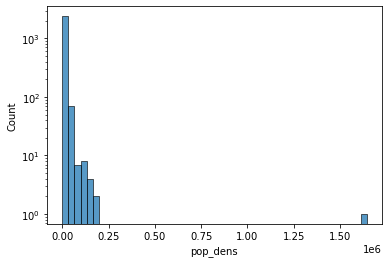

In [148]:
sns.histplot(data=eq, x='pop_dens', bins=50)
plt.yscale('log')

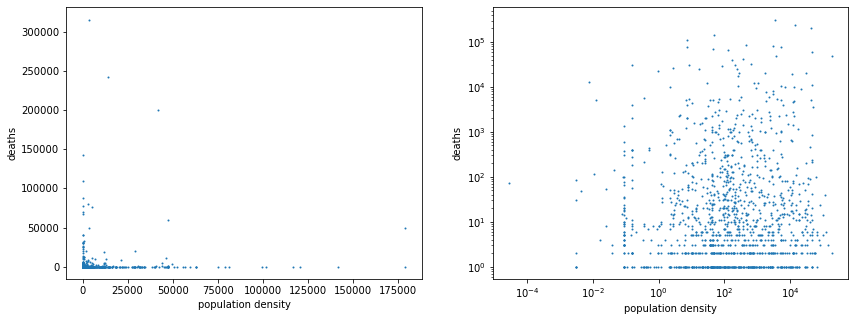

In [149]:
# There are some very large and some very small population densities. These could be dropped as outliers in future.
# No obvious trend between deaths and population density at first glance however.
fig, ax = plt.subplots(1,2, figsize=(14,5))
for a in ax:
    a.scatter(x=eq['pop_dens'],y=eq['deaths'],s=1)
    a.set_xlabel('population density')
    a.set_ylabel('deaths')
ax[1].set_xscale('log')
ax[1].set_yscale('log')

<AxesSubplot:xlabel='pop_dens', ylabel='deaths'>

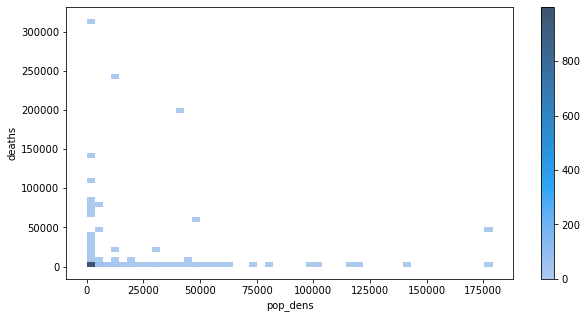

In [150]:
plt.figure(figsize=(10,5))
sns.histplot(data=eq, x='pop_dens', y='deaths', bins=50, cbar=True)

In [151]:
len(eq[eq['pop_dens']>1e5]) # 14 earthquakes near places with population density > 1e5

14

In [152]:
# Plot earthquake locations with colour = population density on a map (N.B. log colour scale)
fig = px.scatter_geo(eq, lat='latitude', lon='longitude', hover_name='locationName', color=np.log10(eq['pop_dens']),
                    color_continuous_scale='Hot')
fig.update_layout(title='Earthquakes nearby population density (people/100km^2)', title_x=0.5,
                 coloraxis_colorbar=dict(
                    title="pop_dens",
                    tickvals=[-4,-2,0,2,4,6],
                    ticktext=['0.0001', '0.01', '1', '100', '10,000', '1,000,000']
                 )
                 )
fig.update_traces(marker=dict(size=2))
fig.show()

In [153]:
# Do the same again but not in log scale, neglecting the earthquakes with very small/large population densities
fig = px.scatter_geo(eq[(eq['pop_dens']<1000) & (eq['pop_dens']>0.01)], lat='latitude', lon='longitude', hover_name='locationName',
                     color=eq[(eq['pop_dens']<1000) & (eq['pop_dens']>0.01)]['pop_dens'], color_continuous_scale='Hot')
fig.update_layout(title='Earthquakes nearby population density (people/100km^2), neglecting small/large pop. dens.', title_x=0.5,
#                  coloraxis_colorbar=dict(
#                     title="pop_dens",
#                     tickvals=[-1,0,1,2,3],
#                     ticktext=['0.1', '1', '10', '100', '1,000']
#                  )
                 )
fig.update_traces(marker=dict(size=2))
fig.show()

In [154]:
# These plots are in approximate agreement with the population densities found online, for example:

![world_pop](World_population_density_1994_-_with_equator.png)

Source: https://upload.wikimedia.org/wikipedia/commons/4/49/World_population_density_1994_-_with_equator.png

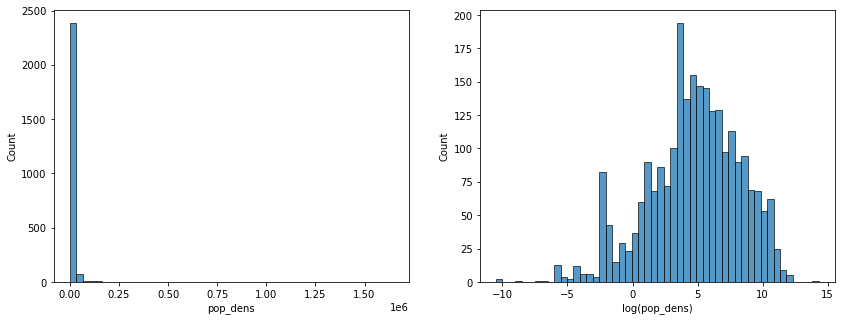

In [155]:
# Population density is right-skewed
# Simply taking the log of the distribution makes it more gaussian
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(x=eq['pop_dens'], bins=50, ax=ax[0])
sns.histplot(x=np.log(eq['pop_dens']), bins=50, ax=ax[1])
_ = ax[1].set_xlabel('log(pop_dens)')

In [156]:
import statsmodels.api as sm

C:\Users\emily\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

C:\Users\emily\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



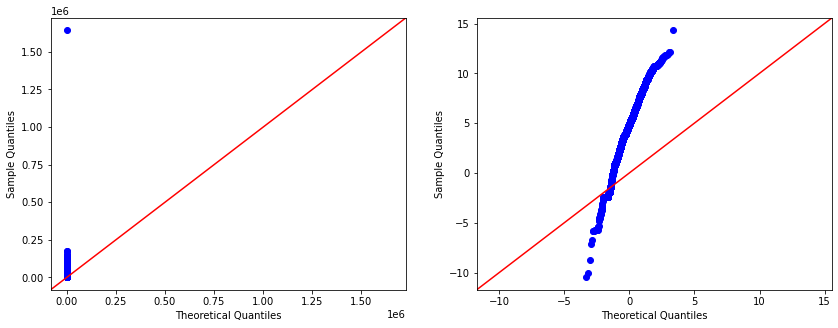

In [157]:
# Q-Q plots also show the improvement, although it isn't perfectly gaussian
fig, ax = plt.subplots(1,2, figsize=(14,5))
_ = sm.qqplot(eq['pop_dens'], line ='45', ax=ax[0])
_ = sm.qqplot(np.log(eq['pop_dens']), line ='45', ax=ax[1])

To do later (after train-test-split):
- Test whether another transformation (e.g. box-cox) can improve the gaussian-ness

In [158]:
# Create new log_pop_dens column and drop old one
eq['log_pop_dens'] = np.log(eq['pop_dens'])
eq.drop('pop_dens', axis=1, inplace=True)

In [159]:
eq.head()

year                     region                  locationName  \
id                                                                   
122   500  Central Asia and Caucasus                    KAZAKHSTAN   
276   942  Central Asia and Caucasus          UZBEKISTAN:  BUKHARA   
464  1267                Middle East  IRAN:  NEYSHABUR (NEISHABUR)   
472  1275  Central Asia and Caucasus                       GEORGIA   
481  1281                Middle East              IRAN:  SHADIYAKH   

        country  latitude  longitude  magnitude  depth  deaths  \
id                                                               
122  KAZAKHSTAN      42.7       76.5        6.7   20.0     NaN   
276  UZBEKISTAN      39.7       64.5        6.7   20.0     NaN   
464        IRAN      36.0       58.8        5.8   10.0     NaN   
472     GEORGIA      42.1       44.2        6.7   28.0     NaN   
481        IRAN      36.1       58.8        5.8   10.0     NaN   

     deathsCategory  damageMillionsDollarsCategory  caused_tsunami  \
id                                                                   
122             NaN                            3.0               0   
276             NaN                            3.0               0   
464             NaN                            3.0               0   
472             3.0                            3.0               0   
481             NaN                            3.0               0   

     caused_volcano  log_pop_dens  
id                                 
122               0      6.023938  
276               0      8.516710  
464               0      8.731032  
472               0      5.113992  
481               0      9.460052

<AxesSubplot:xlabel='damageMillionsDollarsCategory', ylabel='Count'>

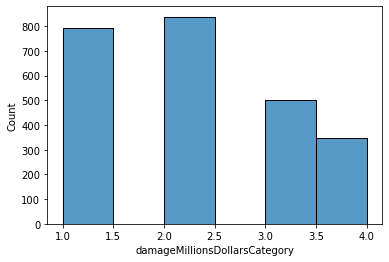

In [160]:
# Reasonable balance in the distribution of categorical values in damageMillionsDollarsCategory -> do nothing.
sns.histplot(x=eq['damageMillionsDollarsCategory'], bins=6)

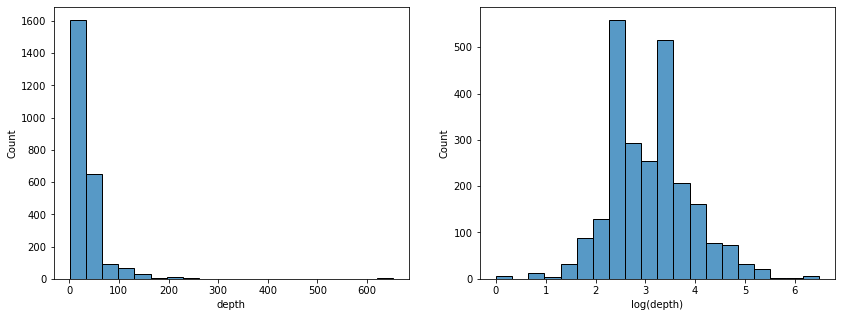

In [161]:
# Depth is right skewed, transform using log (adding 1 to each value to remove zeros)
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(x=eq['depth']+1, bins=20, ax=ax[0])
sns.histplot(x=np.log(eq['depth']+1), bins=20, ax=ax[1])
_ = ax[1].set_xlabel('log(depth)')

In [162]:
eq['log_depth'] = np.log(eq['depth']+1)

In [163]:
eq.drop('depth', axis=1, inplace=True)

<AxesSubplot:xlabel='magnitude', ylabel='Count'>

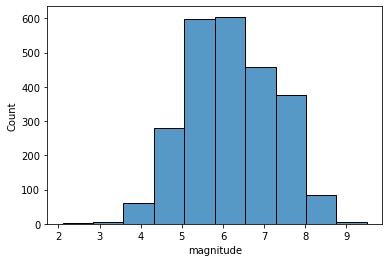

In [164]:
# Magnitude is technically already measured on a log scale so as expected, already looks gaussian
sns.histplot(x=eq['magnitude'], bins=10)

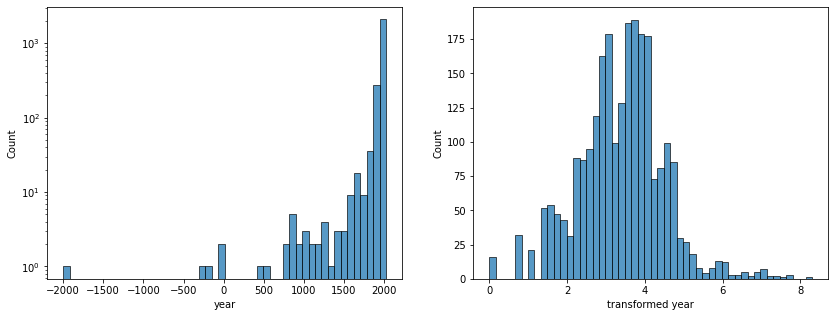

In [165]:
# The year could be interesting. Will try with/without it when training the ML models below.
# Year is left-skewed. Can transform it to be approx. gaussian by reflecting (using maximum year) followed by the log.
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(x=eq['year'], bins=50, log_scale=(False,True), ax=ax[0])
sns.histplot(x=np.log(max(eq['year'])-eq['year']+1), bins=50, ax=ax[1])
_ = ax[1].set_xlabel('transformed year')

In [166]:
eq['trans_year'] = np.log(max(eq['year'])-eq['year']+1)
eq.drop('year', axis=1, inplace=True)

In [167]:
# Finally, drop features that I don't want to/can't use
eq.drop(['region', 'locationName', 'country', 'latitude', 'longitude'], axis=1, inplace=True)

In [168]:
eq.head()

magnitude  deaths  deathsCategory  damageMillionsDollarsCategory  \
id                                                                      
122        6.7     NaN             NaN                            3.0   
276        6.7     NaN             NaN                            3.0   
464        5.8     NaN             NaN                            3.0   
472        6.7     NaN             3.0                            3.0   
481        5.8     NaN             NaN                            3.0   

     caused_tsunami  caused_volcano  log_pop_dens  log_depth  trans_year  
id                                                                        
122               0               0      6.023938   3.044522    7.328437  
276               0               0      8.516710   3.044522    6.985642  
464               0               0      8.731032   2.397895    6.628041  
472               0               0      5.113992   3.367296    6.617403  
481               0               0      9.460052   2.397895    6.609349

TODO:
- Investigate whether earthquakes occured in the same place. Seems to be repeated values in e.g. log(depth) distribuion. Can't be duplicated values as I checked and removed those?

# Train-test split

I plan on trying to predict the number of deaths as well as classify the earthquakes according to the deathsCategory.

Before any ML, still have entries with NaN values in the deaths and deathsCategory. Will move these to another dataframe for later.

In [169]:
# Move entries with NaN values
eq_nan_deaths = eq[eq['deaths'].isna()]
eq_nan_deathsCategory = eq[eq['deathsCategory'].isna()]

In [170]:
eq_nan_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 122 to 10488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   magnitude                      1224 non-null   float64
 1   deaths                         0 non-null      float64
 2   deathsCategory                 65 non-null     float64
 3   damageMillionsDollarsCategory  1224 non-null   float64
 4   caused_tsunami                 1224 non-null   int64  
 5   caused_volcano                 1224 non-null   int64  
 6   log_pop_dens                   1224 non-null   float64
 7   log_depth                      1224 non-null   float64
 8   trans_year                     1224 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 95.6 KB


In [171]:
eq_nan_deathsCategory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 122 to 10488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   magnitude                      1159 non-null   float64
 1   deaths                         0 non-null      float64
 2   deathsCategory                 0 non-null      float64
 3   damageMillionsDollarsCategory  1159 non-null   float64
 4   caused_tsunami                 1159 non-null   int64  
 5   caused_volcano                 1159 non-null   int64  
 6   log_pop_dens                   1159 non-null   float64
 7   log_depth                      1159 non-null   float64
 8   trans_year                     1159 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 90.5 KB


In [172]:
# Remove nan entries from eq
eq.dropna(axis=0, inplace=True)

In [173]:
eq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1254 entries, 1028 to 10627
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   magnitude                      1254 non-null   float64
 1   deaths                         1254 non-null   float64
 2   deathsCategory                 1254 non-null   float64
 3   damageMillionsDollarsCategory  1254 non-null   float64
 4   caused_tsunami                 1254 non-null   int64  
 5   caused_volcano                 1254 non-null   int64  
 6   log_pop_dens                   1254 non-null   float64
 7   log_depth                      1254 non-null   float64
 8   trans_year                     1254 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 98.0 KB


Can now perform the train-test split.

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X = eq.drop(['deaths', 'deathsCategory'], axis=1)
y_reg = eq['deaths'] # regression
y_class = eq['deathsCategory'] # classification

In [176]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.3, random_state=111)

In [177]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=222)

# PCA

Aim: Understand which features are the most important.

In [178]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [179]:
sc = StandardScaler()

In [180]:
sc.fit(X_reg_train)

StandardScaler()

In [181]:
sc_X_reg_train = sc.fit_transform(X_reg_train) # fit and transform using training data
sc_X_reg_test = sc.transform(X_reg_test) # transform test data using scaling found from training data

In [182]:
pca = PCA(n_components=None, random_state=111)

In [183]:
pca.fit(sc_X_reg_train) # obtain components

PCA(random_state=111)

In [184]:
pca_components = pd.DataFrame(abs(pca.components_), index=range(1,8),
                              columns=eq.drop(['deaths','deathsCategory'], axis=1).columns)

In [185]:
pca_components

magnitude  damageMillionsDollarsCategory  caused_tsunami  caused_volcano  \
1   0.600688                       0.259302        0.506845        0.109403   
2   0.026507                       0.765222        0.005604        0.195028   
3   0.004936                       0.066630        0.257937        0.719036   
4   0.028675                       0.115501        0.109269        0.589167   
5   0.271289                       0.068781        0.383710        0.156352   
6   0.086564                       0.500158        0.527771        0.246512   
7   0.746012                       0.273001        0.488702        0.025504   

   log_pop_dens  log_depth  trans_year  
1      0.232795   0.345802    0.359588  
2      0.374126   0.459874    0.155599  
3      0.255278   0.506715    0.300109  
4      0.682807   0.225244    0.331391  
5      0.493697   0.127622    0.699977  
6      0.170841   0.466347    0.395440  
7      0.038999   0.357317    0.016118

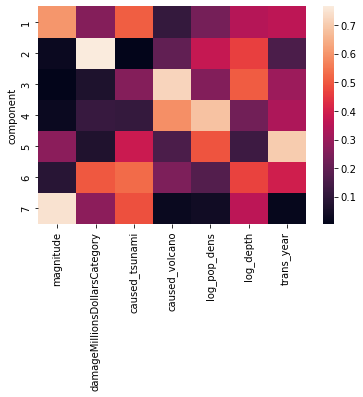

In [186]:
sns.heatmap(pca_components)
_ = plt.ylabel('component')

In [187]:
components = len(pca.explained_variance_ratio_)

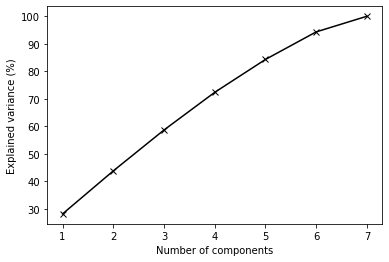

In [188]:
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100), 'kx-')
_ = plt.xlabel("Number of components")
_ = plt.ylabel("Explained variance (%)")

Although some features are slightly more important, all components are required to explain >95% of the variation. For example, magnitude contributes heavily to the first component but the first component only explains ~30% of the variation. Similarly, damage contributes heavily to the second component but the second component only explains ~15% of the variation from the first/second components combined.

# Regression

In [1]:
from sklearn import metrics

In [212]:
# Function that analyses prediction results for the models investigated later
def analyse_prediction_results(predictions, test):
    """
    Produce plots of prediction vs. true and true-prediction.
    
    Prints and returns mae and rmse for comparison of different models later on.
    """
    # Plot prediction vs. true
    plt.scatter(test, predictions, label='Prediction', s=2)
    plt.plot(range(0,350000), range(0,350000), 'r', label='y=x')
    plt.xlabel('True')
    plt.ylabel('Predicted')
    plt.xscale('log')
    plt.ylim([-13000,13000])
    plt.legend()
    
    # Plot test - predictions
    sns.displot((test-predictions), bins=50)
    plt.xlabel('true - predicted (g/km)')
    plt.yscale('log')
    
    # Metics
    mae = metrics.mean_absolute_error(test, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(test, predictions))
    print('MAE:', mae)
    print('RMSE:', rmse)
    return mae, rmse

In [424]:
# Try predicting deaths
# Try using pipeline

## Linear model

In [193]:
from sklearn.linear_model import LinearRegression

In [194]:
lm = LinearRegression()

In [195]:
lm.fit(X_reg_train, y_reg_train) # N.B. Scaled dataframe not needed

LinearRegression()

In [196]:
pd.DataFrame(lm.coef_, X_reg_train.columns, columns=['Coefficient'])

Coefficient
magnitude                      2094.615477
damageMillionsDollarsCategory  1837.137282
caused_tsunami                  153.681400
caused_volcano                -3000.747850
log_pop_dens                    414.089528
log_depth                      -596.347310
trans_year                     1144.857629

In [197]:
linear_predictions = lm.predict(X_reg_test)

MAE: 4342.423696907219
RMSE: 16831.48825225515


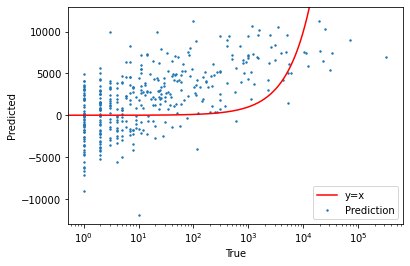

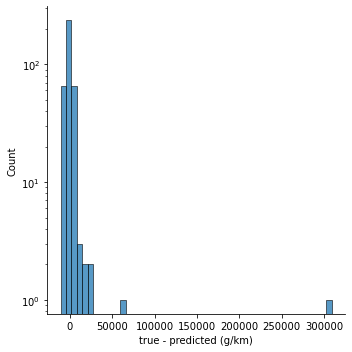

In [213]:
linear_mae, linear_rmse = analyse_prediction_results(linear_predictions, y_reg_test)

Linear model doesn't do a very good job! It is even predicting negative numbers of deaths.

There are, however, large outliers that will be affecting the result (or the interpretation of the result). Maybe if these were removed, this would improve. Before trying this, try a different model.

## Random forest

In [214]:
from sklearn.ensemble import RandomForestRegressor

In [215]:
rf = RandomForestRegressor()
rf.fit(X_reg_train, y_reg_train) # Again, scaled values are not needed

RandomForestRegressor()

In [216]:
rf_predictions = rf.predict(X_reg_test)

MAE: 2684.946889036251
RMSE: 17148.840938534187


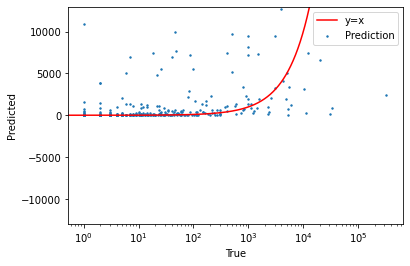

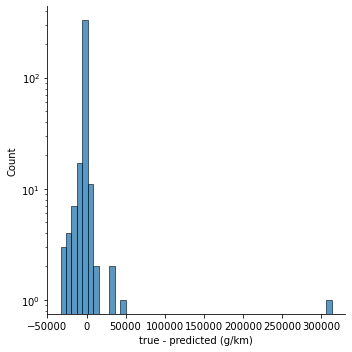

In [218]:
rf_mae, rf_rmse = analyse_prediction_results(rf_predictions, y_reg_test)

No longer getting negative numbers of deaths which is great. The MAE has also reduced by 38%, although the RMSE is about the same.

## KNN

In [224]:
from sklearn.neighbors import KNeighborsRegressor

In [226]:
knn = KNeighborsRegressor(n_neighbors=5)

In [227]:
knn.fit(sc_X_reg_train,y_reg_train) # N.B. Require scaled inputs here!

KNeighborsRegressor()

In [229]:
knn_predictions = knn.predict(sc_X_reg_test)

MAE: 2904.8594164456235
RMSE: 17870.642542775877


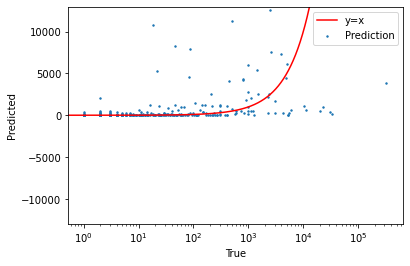

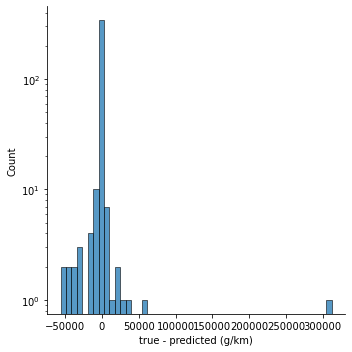

In [230]:
knn_mae, knn_rmse = analyse_prediction_results(knn_predictions, y_reg_test)

KNN produces very similar results (technically slightly worse) to the random forest.

## Hyperparameter optimisation

The models used above used the default parameters. Can these be optimised?

Whilst we're still keeping the outliers, will use the rmse to compare the models rather than the mae in order to penalise the larger errors.

In [205]:
import optuna

In [235]:
def objective(trial):
    """
    Function to optimise random forest hyperparameters by minimising the rmse.
    """
    # Specify parameters to optimise
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 10, 400)
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
    # Create regressor
    rf = RandomForestRegressor(max_depth=rf_max_depth, n_estimators=rf_n_estimators)
    # Do training
    rf.fit(X_reg_train, y_reg_train)
    # Predict
    rf_predictions = rf.predict(X_reg_test)
    # Return rmse
    rmse = np.sqrt(metrics.mean_squared_error(y_reg_test, rf_predictions))
    return rmse

In [237]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-07-08 10:36:54,833] A new study created in memory with name: no-name-d0f1f5ac-349e-432f-941d-f6414e6b151e
C:\Users\emily\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-07-08 10:36:55,546] Trial 0 finished with value: 17150.1701446643 and parameters: {'rf_n_estimators': 143, 'rf_max_depth': 30}. Best is trial 0 with value: 17150.1701446643.
[I 2022-07-08 10:36:55,608] Trial 1 finished with value: 17569.571282672456 and parameters: {'rf_n_estimators': 11, 'rf_max_depth': 29}. Best is trial 0 with value: 17150.1701446643.
[I 2022-07-08 10:36:56,404] Trial 2 finished with value: 17264.55608756472 and parameters: {'rf_n_estimators': 193, 'rf_max_depth': 12}. Best is trial 0 with value: 17150.1701446643.
[I 2022-07-08 10:36:56,609] Trial 3 finished with value: 17267.347115849585 and parameters: {'rf_n_estimators': 47, 'rf_max_depth': 17}. Best is trial 0 with value: 17150.1701446643.
[I 2022-07-08 10:36:57,335] Trial 4 finished with value: 17253.067345559088 and parameters: {'rf_n_estimators': 119, 'rf_max_depth': 25}. Best is trial 0 with value: 17150.1701446643.
[I 2022-07-08 10:36:57,720] Trial 5 finished with value: 17468.845652053125 and param

[I 2022-07-08 10:37:15,151] Trial 42 finished with value: 17081.677198926747 and parameters: {'rf_n_estimators': 180, 'rf_max_depth': 3}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:15,516] Trial 43 finished with value: 16938.029017174882 and parameters: {'rf_n_estimators': 192, 'rf_max_depth': 2}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:15,893] Trial 44 finished with value: 17276.773730993656 and parameters: {'rf_n_estimators': 155, 'rf_max_depth': 4}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:16,044] Trial 45 finished with value: 17154.093054255678 and parameters: {'rf_n_estimators': 37, 'rf_max_depth': 5}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:16,445] Trial 46 finished with value: 17017.52945713905 and parameters: {'rf_n_estimators': 200, 'rf_max_depth': 3}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:16,965] Trial 47 finished with value: 17129.209

[I 2022-07-08 10:37:31,023] Trial 84 finished with value: 17238.251654059964 and parameters: {'rf_n_estimators': 108, 'rf_max_depth': 4}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:31,235] Trial 85 finished with value: 16918.80769111619 and parameters: {'rf_n_estimators': 92, 'rf_max_depth': 2}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:31,465] Trial 86 finished with value: 17063.33917822774 and parameters: {'rf_n_estimators': 104, 'rf_max_depth': 3}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:31,767] Trial 87 finished with value: 17255.380526940597 and parameters: {'rf_n_estimators': 115, 'rf_max_depth': 5}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:31,915] Trial 88 finished with value: 17163.16099475726 and parameters: {'rf_n_estimators': 53, 'rf_max_depth': 4}. Best is trial 25 with value: 16854.266245971707.
[I 2022-07-08 10:37:32,119] Trial 89 finished with value: 16874.847616

Small improvement for the random forest using the optimisation.

In [238]:
def objective(trial):
    """
    Function to optimise knn hyperparameters by minimising the rmse.
    """
    # Specify parameters to optimise
    knn_n_neighbors = trial.suggest_int('knn_n_neighbors', 1, 20)
    # Create regressor
    knn = KNeighborsRegressor(n_neighbors=knn_n_neighbors)
    # Do training
    knn.fit(sc_X_reg_train, y_reg_train) # scaled inputs
    # Predict
    knn_predictions = knn.predict(sc_X_reg_test)
    # Return rmse
    rmse = np.sqrt(metrics.mean_squared_error(y_reg_test, knn_predictions))
    return rmse

In [239]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-07-08 10:42:44,554] A new study created in memory with name: no-name-b1874c09-0908-4df4-8315-8db512c93c85
C:\Users\emily\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-07-08 10:42:44,611] Trial 0 finished with value: 18338.60205770568 and parameters: {'knn_n_neighbors': 3}. Best is trial 0 with value: 18338.60205770568.
[I 2022-07-08 10:42:44,626] Trial 1 finished with value: 16839.05445023672 and parameters: {'knn_n_neighbors': 15}. Best is trial 1 with value: 16839.05445023672.
[I 2022-07-08 10:42:44,644] Trial 2 finished with value: 16726.35436674512 and parameters: {'knn_n_neighbors': 11}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:44,659] Trial 3 finished with value: 16839.05445023672 and parameters: {'knn_n_neighbors': 15}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:44,680] Trial 4 finished with value: 16792.6578690406 and parameters: {'knn_n_neighbors': 20}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:44,695] Trial 5 finished with value: 16783.15277739466 and parameters: {'knn_n_neighbors': 8}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:44,71

[I 2022-07-08 10:42:45,856] Trial 48 finished with value: 16812.572255273855 and parameters: {'knn_n_neighbors': 12}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:45,877] Trial 49 finished with value: 16839.05445023672 and parameters: {'knn_n_neighbors': 15}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:45,901] Trial 50 finished with value: 16783.15277739466 and parameters: {'knn_n_neighbors': 8}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:45,919] Trial 51 finished with value: 21787.93136898321 and parameters: {'knn_n_neighbors': 1}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:45,943] Trial 52 finished with value: 16726.35436674512 and parameters: {'knn_n_neighbors': 11}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:45,972] Trial 53 finished with value: 16726.35436674512 and parameters: {'knn_n_neighbors': 11}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:

[I 2022-07-08 10:42:47,179] Trial 96 finished with value: 16796.924007511963 and parameters: {'knn_n_neighbors': 19}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:47,209] Trial 97 finished with value: 16812.572255273855 and parameters: {'knn_n_neighbors': 12}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:47,230] Trial 98 finished with value: 16832.291851032776 and parameters: {'knn_n_neighbors': 13}. Best is trial 2 with value: 16726.35436674512.
[I 2022-07-08 10:42:47,253] Trial 99 finished with value: 16844.268998837382 and parameters: {'knn_n_neighbors': 14}. Best is trial 2 with value: 16726.35436674512.


Small improvement for the knn using the optimisation.

## Regression after removal of outliers

Dataset clearly contains some outliers. Remove these using the IQR in order to try and improve the model predictions.

Will only remove univariate (deaths) outliers for now.

In [247]:
# Find IQR
Q1 = eq['deaths'].quantile(0.25) # 1st quartile
Q3 = eq['deaths'].quantile(0.75) # 3rd quartile
IQR = Q3 - Q1
print(Q1, Q3, IQR)

2.0 76.75 74.75


In [248]:
eq.shape

(1254, 9)

In [251]:
# Remove earthquakes with deaths outside of range [Q1-1.5*IQR, Q3+1.5*IQR]
eq_no_out = eq[(eq['deaths']>(Q1-1.5*IQR)) & (eq['deaths']<(Q3+1.5*IQR))]

In [255]:
# New train-test split
X_no_out = eq_no_out.drop(['deaths', 'deathsCategory'], axis=1)
y_reg_no_out = eq_no_out['deaths'] # regression
X_reg_train_no_out, X_reg_test_no_out, y_reg_train_no_out, y_reg_test_no_out = train_test_split(X_no_out, y_reg_no_out, test_size=0.3, random_state=111)

In [256]:
# Random forest model
rf = RandomForestRegressor()
rf.fit(X_reg_train_no_out, y_reg_train_no_out) # Again, scaled values are not needed
rf_predictions = rf.predict(X_reg_test_no_out)

MAE: 21.29485776330076
RMSE: 32.67934045908997


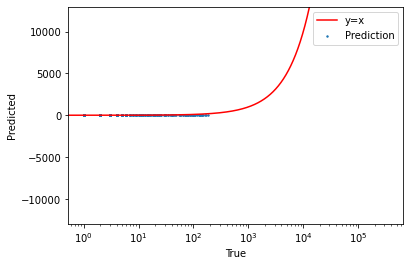

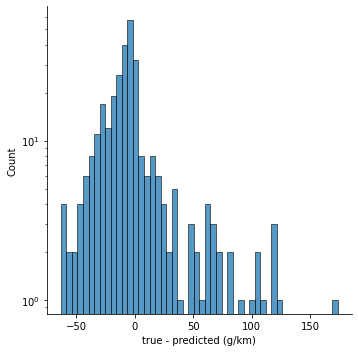

In [257]:
rf_mae_no_out, rf_rmse_no_out = analyse_prediction_results(rf_predictions, y_reg_test_no_out)

In [259]:
eq_no_out['deaths'].describe()

count    1023.000000
mean       19.799609
std        34.050784
min         1.000000
25%         2.000000
50%         5.000000
75%        20.000000
max       185.000000
Name: deaths, dtype: float64

As expected, mae and rmse reduced dramatically but on the scale of the deaths we're looking at (O(10)), the predictions are still very poor (relative error >100%).

## Training without 'year'

The 'year' feature may be adversely affecting the prediction as it may/may not be relevant and could result in overfitting. Try removing it and look for improvement.

In [260]:
# Remove year feature
eq_no_year = eq.drop('trans_year', axis=1)

In [261]:
# New train-test split
X_no_year = eq_no_year.drop(['deaths', 'deathsCategory'], axis=1)
y_reg_no_year = eq_no_year['deaths'] # regression
X_reg_train_no_year, X_reg_test_no_year, y_reg_train_no_year, y_reg_test_no_year = train_test_split(X_no_year, y_reg_no_year, test_size=0.3, random_state=111)

In [262]:
# Random forest model
rf = RandomForestRegressor()
rf.fit(X_reg_train_no_year, y_reg_train_no_year) # Again, scaled values are not needed
rf_predictions = rf.predict(X_reg_test_no_year)

MAE: 2753.050920424403
RMSE: 16296.953445766057


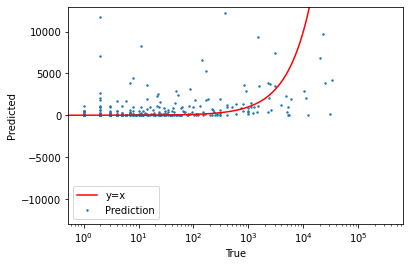

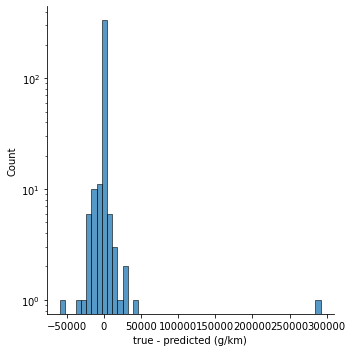

In [263]:
rf_mae_no_year, rf_rmse_no_year = analyse_prediction_results(rf_predictions, y_reg_test_no_year)

This is a bit better than before but unfortunately still poor.

## Possible improvements

Planned improvements that could be made to hopefully improve the prediction power:
- Use a better estimate of the local population density (e.g. sum of tiles surrounding earthquake location).
- Optimise method used to remove missing data (e.g. remove features I now know I won't be using first).
- Try box-cox transformation of variables instead of simply using log.

# Classification

Can we do better by, instead of predicting the number of deaths, predicting the 'deathsCategory' each earthquake belongs in?

In [151]:
# Try classifying earthquakes into deaths category

In [265]:
# Are classes we're trying to predict reasonably balanced?
# See https://machinelearningmastery.com/what-is-imbalanced-classification/
# See https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

<AxesSubplot:xlabel='deathsCategory', ylabel='Count'>

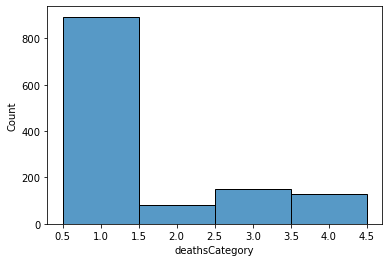

In [194]:
# The classes we're predicting aren't reasonable balanced - may need to do something but let's try as is for now.
sns.histplot(x=eq['deathsCategory'], bins=4, binrange=(0.5,4.5))

## Logistic regression

In [189]:
#X_class_train, X_class_test, y_class_train, y_class_test

In [189]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [191]:
# Use a grid search with cross validation to find the optimal C value
# Use stratified k fold over standard k fold as our dataset is imbalanced
# Use f1-score as the scorer as dataset is imbalanced

In [286]:
# Need a custom scorer to allow f1-score to be used for multiclass classification. Want to use f1-score as imbalanced.
custom_f1 = make_scorer(f1_score, average="weighted") # weighted average used as imbalanced

In [287]:
# Cs=10 means 10 values used in range [1e-4, 1e4]. Solver set to newton-cg as others didn't converge in 100 iterations.
logmodel = LogisticRegressionCV(solver='newton-cg', Cs=10, scoring=custom_f1, verbose=1, multi_class="multinomial")

In [288]:
logmodel.fit(X_class_train, y_class_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


LogisticRegressionCV(multi_class='multinomial',
                     scoring=make_scorer(f1_score, average=weighted),
                     solver='newton-cg', verbose=1)

In [289]:
logmodel.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [290]:
logmodel.scores_ # keys=classes, values=array of scores from each fold. Numbers repeated for each class as multinomial classification

{1.0: array([[0.58988976, 0.58988976, 0.61253225, 0.68394465, 0.68065747,
         0.68715535, 0.68640656, 0.68640656, 0.68640656, 0.68640656],
        [0.58988976, 0.58988976, 0.62504903, 0.68774178, 0.68304887,
         0.70334102, 0.70334102, 0.70334102, 0.70334102, 0.70334102],
        [0.5952381 , 0.5952381 , 0.58964525, 0.66475668, 0.69822281,
         0.70374512, 0.69961807, 0.70073881, 0.70073881, 0.70073881],
        [0.5952381 , 0.5952381 , 0.64068445, 0.67481617, 0.69265745,
         0.68915114, 0.68623377, 0.6832951 , 0.6832951 , 0.6832951 ],
        [0.58771142, 0.58771142, 0.5896836 , 0.67967112, 0.67697613,
         0.69291402, 0.69291402, 0.69291402, 0.69291402, 0.69291402]]),
 2.0: array([[0.58988976, 0.58988976, 0.61253225, 0.68394465, 0.68065747,
         0.68715535, 0.68640656, 0.68640656, 0.68640656, 0.68640656],
        [0.58988976, 0.58988976, 0.62504903, 0.68774178, 0.68304887,
         0.70334102, 0.70334102, 0.70334102, 0.70334102, 0.70334102],
        [0.5952

In [291]:
logmodel.C_[0] # Best C value in gridsearch. Only need first element as all the same as multinomial classification.

2.782559402207126

In [292]:
logpred = logmodel.predict(X_class_test)

In [293]:
# Comments on this made below
print(classification_report(y_class_test,logpred))

              precision    recall  f1-score   support

         1.0       0.81      0.96      0.88       270
         2.0       0.00      0.00      0.00        26
         3.0       0.33      0.05      0.08        44
         4.0       0.53      0.76      0.62        37

    accuracy                           0.77       377
   macro avg       0.42      0.44      0.40       377
weighted avg       0.67      0.77      0.70       377



C:\Users\emily\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\emily\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\emily\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [294]:
# Can we do better with class_weight="balanced"? This adjusts weights based on class frequencies.
logmodel_bal = LogisticRegressionCV(solver='newton-cg', Cs=10, scoring=custom_f1, verbose=1, multi_class="multinomial", class_weight="balanced")

In [295]:
logmodel_bal.fit(X_class_train, y_class_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


LogisticRegressionCV(class_weight='balanced', multi_class='multinomial',
                     scoring=make_scorer(f1_score, average=weighted),
                     solver='newton-cg', verbose=1)

In [296]:
logmodel_bal.scores_

{1.0: array([[0.49738863, 0.60411837, 0.64055158, 0.6546247 , 0.65153848,
         0.64973128, 0.65427355, 0.65427355, 0.65427355, 0.65427355],
        [0.60497528, 0.6402194 , 0.7019082 , 0.68121921, 0.68947892,
         0.68497816, 0.68497816, 0.68497816, 0.68497816, 0.68497816],
        [0.57480424, 0.64991878, 0.66719618, 0.65214715, 0.65923708,
         0.65692541, 0.66407967, 0.66407967, 0.66407967, 0.66407967],
        [0.63637562, 0.65829931, 0.68612531, 0.68042589, 0.67561327,
         0.66896147, 0.65633596, 0.65633596, 0.65633596, 0.65633596],
        [0.58861578, 0.6342452 , 0.64452338, 0.65498907, 0.66033062,
         0.63969403, 0.64051669, 0.64051669, 0.64051669, 0.64051669]]),
 2.0: array([[0.49738863, 0.60411837, 0.64055158, 0.6546247 , 0.65153848,
         0.64973128, 0.65427355, 0.65427355, 0.65427355, 0.65427355],
        [0.60497528, 0.6402194 , 0.7019082 , 0.68121921, 0.68947892,
         0.68497816, 0.68497816, 0.68497816, 0.68497816, 0.68497816],
        [0.5748

In [297]:
logmodel_bal.C_[0] # Best C is different now but f1-scores fairly similar across all C values

0.005994842503189409

In [300]:
logpred_bal = logmodel_bal.predict(X_class_test)

In [302]:
# Compare the two models
print("Without frequency adjusted weights:")
print(classification_report(y_class_test,logpred, zero_division=0))
print("\nWith frequency adjusted weights:")
print(classification_report(y_class_test,logpred_bal, zero_division=0))

Without frequency adjusted weights:
              precision    recall  f1-score   support

         1.0       0.81      0.96      0.88       270
         2.0       0.00      0.00      0.00        26
         3.0       0.33      0.05      0.08        44
         4.0       0.53      0.76      0.62        37

    accuracy                           0.77       377
   macro avg       0.42      0.44      0.40       377
weighted avg       0.67      0.77      0.70       377


With frequency adjusted weights:
              precision    recall  f1-score   support

         1.0       0.92      0.79      0.85       270
         2.0       0.12      0.12      0.12        26
         3.0       0.22      0.25      0.24        44
         4.0       0.38      0.76      0.51        37

    accuracy                           0.67       377
   macro avg       0.41      0.48      0.43       377
weighted avg       0.73      0.67      0.69       377



Summary:
- In both cases, predicting class 1 well. This is expected as it is the majority class. The prediction worsens slightly when we adjust the weights for the class frequency but we do benefit in other classes, as mentioned below.
- Without adjusting weights for class frequencies, classes 2 and 3 are very poorly predicted (0 and 0.08 f1-scores). This is improved by adjusting weights for class frequency but predictions are still not great (0.12 and 0.24 f1-scores). 
- In class 4, the prediction is ok but not great. Interestingly, the f1-score worsens slightly when the weights are adjusted despite the low frequency in this class. This is due to the decrease in precision. I guess this is the cost of the improvements made in classes 2 and 3?
- The macro/weighted average f1-score is very similar without/with adjusting the weights. I guess the overall situation could be improved by changing this to a binary classification problem (combine classes 2, 3 and 4).

## Random forest

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
# balanced means weights are computed based on the class frequencies
rfc = RandomForestClassifier(class_weight='balanced', verbose=1)

In [310]:
rfc.fit(X_class_train, y_class_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(class_weight='balanced', verbose=1)

In [311]:
rfc_pred = rfc.predict(X_class_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [312]:
print(classification_report(y_class_test, rfc_pred))

              precision    recall  f1-score   support

         1.0       0.80      0.95      0.87       270
         2.0       0.50      0.04      0.07        26
         3.0       0.28      0.11      0.16        44
         4.0       0.50      0.51      0.51        37

    accuracy                           0.75       377
   macro avg       0.52      0.40      0.40       377
weighted avg       0.69      0.75      0.70       377



This is a bit worse than the logistic regression so far but can the RF hyperparameters be optimised?

In [314]:
# No random forest equivalent of LogisticRegressionCV so need GridSearch instead
from sklearn.model_selection import GridSearchCV

In [318]:
param_grid = {'n_estimators': list(range(20,320,20)),
              'max_depth': list(range(2,34,2))}

In [319]:
grid_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring=custom_f1) # use custom f1-score from earlier

In [320]:
grid_rfc.fit(X_class_train, y_class_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 220 out of 220 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Us

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              verbose=1),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                       24, 26, 28, 30, 32],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180, 200, 220, 240, 260, 280, 300]},
             scoring=make_scorer(f1_score, average=weighted))

In [324]:
grid_rfc.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [342]:
grid_rfc.best_score_

0.722284677410586

In [325]:
grid_rfc.cv_results_

{'mean_fit_time': array([0.07784634, 0.14995561, 0.21394238, 0.34462779, 0.44713757,
        0.49833953, 0.56061304, 0.62558017, 0.74663482, 0.8097518 ,
        0.87837708, 0.93527641, 1.02419305, 1.11982219, 1.26889088,
        0.10386121, 0.17841322, 0.28377659, 0.42175195, 0.42783694,
        0.49687655, 0.55258746, 0.66543062, 0.72918742, 0.89001396,
        0.99857655, 1.04935687, 1.17750001, 1.27667983, 1.33995414,
        0.08909726, 0.17416503, 0.25865419, 0.33044541, 0.44918778,
        0.53408828, 0.67169344, 0.78024628, 0.84281209, 0.90751131,
        0.98252556, 0.96917176, 1.09334803, 1.2191782 , 1.20239213,
        0.10447001, 0.18869817, 0.26240709, 0.32430768, 0.4515857 ,
        0.53582828, 0.64301703, 0.71783745, 0.82940271, 0.97904291,
        1.02000484, 1.04214485, 1.22237339, 1.29293618, 1.4999526 ,
        0.09265966, 0.18183222, 0.27102158, 0.38624005, 0.47354825,
        0.66871002, 0.69773402, 0.74644096, 0.85526807, 0.94417117,
        0.99198675, 1.17034202,

In [332]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    """
    Plots grid search test score results for a 2 parameter search.
    """
    # Get test scores mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot grid search scores
    fig, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid search scores", fontsize=20)
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV average score', fontsize=16)
    ax.legend(fontsize=15, bbox_to_anchor=(1.1, 1.05))
    ax.grid('on')

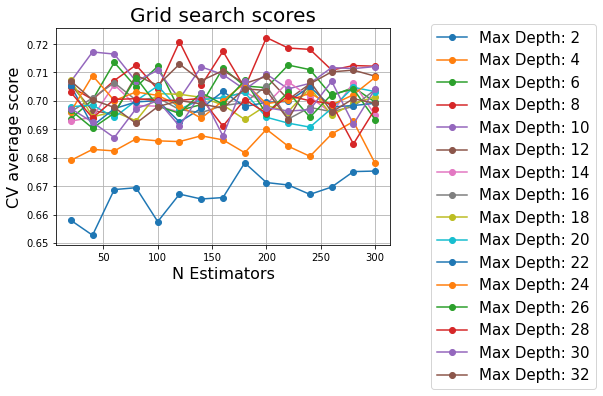

In [333]:
plot_grid_search(grid_rfc.cv_results_, param_grid['n_estimators'], param_grid['max_depth'], 'N Estimators', 'Max Depth')

- Small number of estimators is enough, test scores don't vary too much, especially at larger max depths.
- Max depths of 2 and 4 are noticably worse than larger values.

In [210]:
def analyse_best_model(max_depth, n_estimators):
    """
    Uses best parameters to create a new classifier and prints the classification report.
    """
    # Create classifier
    rfc = RandomForestClassifier(class_weight='balanced', max_depth=max_depth, n_estimators=n_estimators)
    # Do training
    rfc.fit(X_class_train, y_class_train)
    # Predict
    rfc_pred = rfc.predict(X_class_test)

    print(classification_report(y_class_test, rfc_pred))

In [355]:
analyse_best_model(grid_rfc.best_params_['max_depth'], grid_rfc.best_params_['n_estimators'])

              precision    recall  f1-score   support

         1.0       0.87      0.89      0.88       270
         2.0       0.08      0.04      0.05        26
         3.0       0.31      0.27      0.29        44
         4.0       0.44      0.59      0.51        37

    accuracy                           0.73       377
   macro avg       0.42      0.45      0.43       377
weighted avg       0.71      0.73      0.71       377



In [313]:
# Does the hyperparameter optimisation package optuna produce a better result than the grid search?

In [334]:
def objective(trial):
    """
    Function to optimise random forest hyperparameters by maximising the f1-score.
    """
    # Specify parameters to optimise
    rfc_n_estimators = trial.suggest_int('rfc_n_estimators', 20, 300)
    rfc_max_depth = trial.suggest_int('rfc_max_depth', 2, 32)
    # Create classifier
    rfc = RandomForestClassifier(class_weight='balanced', max_depth=rfc_max_depth, n_estimators=rfc_n_estimators)
    # Do training
    rfc.fit(X_class_train, y_class_train)
    # Predict
    rfc_pred = rfc.predict(X_class_test)
    # Return f1-score
    f1 = f1_score(y_class_test, rfc_pred, average='weighted') # 'weighted' means class support/frequency is accounted for
    return f1

In [335]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-07-15 14:31:42,126] A new study created in memory with name: no-name-4982d07a-bb6f-4cca-90b0-acb0d53e664d
C:\Users\emily\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-07-15 14:31:42,929] Trial 0 finished with value: 0.7004035823991461 and parameters: {'rfc_n_estimators': 235, 'rfc_max_depth': 23}. Best is trial 0 with value: 0.7004035823991461.
[I 2022-07-15 14:31:44,380] Trial 1 finished with value: 0.6983854931704431 and parameters: {'rfc_n_estimators': 279, 'rfc_max_depth': 31}. Best is trial 0 with value: 0.7004035823991461.
[I 2022-07-15 14:31:45,136] Trial 2 finished with value: 0.7064348503091589 and parameters: {'rfc_n_estimators': 257, 'rfc_max_depth': 14}. Best is trial 2 with value: 0.7064348503091589.
[I 2022-07-15 14:31:45,402] Trial 3 finished with value: 0.6930210853627053 and parameters: {'rfc_n_estimators': 98, 'rfc_max_depth': 6}. Best is trial 2 with value: 0.7064348503091589.
[I 2022-07-15 14:31:45,740] Trial 4 finished with value: 0.7156301142042241 and parameters: {'rfc_n_estimators': 126, 'rfc_max_depth': 31}. Best is trial 4 with value: 0.7156301142042241.
[I 2022-07-15 14:31:45,822] Trial 5 finished with value: 0.687

[I 2022-07-15 14:32:05,929] Trial 41 finished with value: 0.7118791398413423 and parameters: {'rfc_n_estimators': 217, 'rfc_max_depth': 9}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:06,631] Trial 42 finished with value: 0.7170723426307147 and parameters: {'rfc_n_estimators': 276, 'rfc_max_depth': 10}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:07,253] Trial 43 finished with value: 0.710934549951583 and parameters: {'rfc_n_estimators': 235, 'rfc_max_depth': 11}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:07,957] Trial 44 finished with value: 0.7198207964802058 and parameters: {'rfc_n_estimators': 251, 'rfc_max_depth': 13}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:08,444] Trial 45 finished with value: 0.6785913086425451 and parameters: {'rfc_n_estimators': 221, 'rfc_max_depth': 4}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:08,819] Trial 46 finished with value: 

[I 2022-07-15 14:32:30,015] Trial 82 finished with value: 0.7161801902625039 and parameters: {'rfc_n_estimators': 260, 'rfc_max_depth': 9}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:30,781] Trial 83 finished with value: 0.7108755388663877 and parameters: {'rfc_n_estimators': 287, 'rfc_max_depth': 11}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:31,445] Trial 84 finished with value: 0.703963887393082 and parameters: {'rfc_n_estimators': 271, 'rfc_max_depth': 7}. Best is trial 38 with value: 0.731187257911396.
[I 2022-07-15 14:32:32,176] Trial 85 finished with value: 0.7327753573949894 and parameters: {'rfc_n_estimators': 278, 'rfc_max_depth': 10}. Best is trial 85 with value: 0.7327753573949894.
[I 2022-07-15 14:32:32,376] Trial 86 finished with value: 0.7177580805121048 and parameters: {'rfc_n_estimators': 72, 'rfc_max_depth': 10}. Best is trial 85 with value: 0.7327753573949894.
[I 2022-07-15 14:32:32,995] Trial 87 finished with value:

In [340]:
print('best params = ', study.best_trial.params)
print('f1-score = ', study.best_trial.value)

best params =  {'rfc_n_estimators': 278, 'rfc_max_depth': 10}
f1-score =  0.7327753573949894


In [363]:
analyse_best_model(study.best_trial.params['rfc_max_depth'], study.best_trial.params['rfc_n_estimators'])

              precision    recall  f1-score   support

         1.0       0.84      0.93      0.88       270
         2.0       0.20      0.04      0.06        26
         3.0       0.38      0.25      0.30        44
         4.0       0.48      0.54      0.51        37

    accuracy                           0.75       377
   macro avg       0.47      0.44      0.44       377
weighted avg       0.70      0.75      0.72       377



- Optuna produces ever so slightly better results than the grid search and was also much much faster to run. Parameters it found are similar though.

In [ ]:
# Can imbalance be addressed? Data is meant to be imbalanced as most earthquakes do not result in deaths.
# But would fixing the imbalance address the issue?

In [193]:
from imblearn.over_sampling import SMOTE

In [197]:
y_class.value_counts()

1.0    894
3.0    152
4.0    128
2.0     80
Name: deathsCategory, dtype: int64

In [200]:
# Double the number of minority classes, leaving majority class the same
oversample = SMOTE(sampling_strategy={1 : 894, 2 : 160, 3 : 304, 4 : 256})

In [201]:
X_sm, y_class_sm = oversample.fit_resample(X, y_class)

In [228]:
y_class_sm.value_counts()

1.0    894
3.0    304
4.0    256
2.0    160
Name: deathsCategory, dtype: int64

In [202]:
X_class_train_sm, X_class_test_sm, y_class_train_sm, y_class_test_sm = train_test_split(X_sm, y_class_sm, test_size=0.3, random_state=222)

In [203]:
def objective(trial):
    """
    Function to optimise random forest hyperparameters by maximising the f1-score.
    The oversampled data is used.
    """
    # Specify parameters to optimise
    rfc_n_estimators = trial.suggest_int('rfc_n_estimators', 20, 300)
    rfc_max_depth = trial.suggest_int('rfc_max_depth', 2, 32)
    # Create classifier
    rfc = RandomForestClassifier(class_weight='balanced', max_depth=rfc_max_depth, n_estimators=rfc_n_estimators)
    # Do training
    rfc.fit(X_class_train_sm, y_class_train_sm)
    # Predict
    rfc_pred = rfc.predict(X_class_test_sm)
    # Return f1-score
    f1 = f1_score(y_class_test_sm, rfc_pred, average='weighted') # 'weighted' means class support/frequency is accounted for
    return f1

In [208]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

[I 2022-07-15 15:43:52,198] A new study created in memory with name: no-name-9f8fcdf5-0b96-4d1b-b2a0-3e67af3bc443
C:\Users\emily\anaconda3\lib\site-packages\optuna\progress_bar.py:47: ExperimentalWarning:

Progress bar is experimental (supported from v1.2.0). The interface can change in the future.



  0%|          | 0/100 [00:00<?, ?it/s]

[I 2022-07-15 15:43:54,006] Trial 0 finished with value: 0.7524612844890419 and parameters: {'rfc_n_estimators': 269, 'rfc_max_depth': 27}. Best is trial 0 with value: 0.7524612844890419.
[I 2022-07-15 15:43:54,901] Trial 1 finished with value: 0.7456947427883364 and parameters: {'rfc_n_estimators': 180, 'rfc_max_depth': 11}. Best is trial 0 with value: 0.7524612844890419.
[I 2022-07-15 15:43:56,006] Trial 2 finished with value: 0.7450353662239654 and parameters: {'rfc_n_estimators': 185, 'rfc_max_depth': 30}. Best is trial 0 with value: 0.7524612844890419.
[I 2022-07-15 15:43:57,325] Trial 3 finished with value: 0.7460933347303547 and parameters: {'rfc_n_estimators': 214, 'rfc_max_depth': 21}. Best is trial 0 with value: 0.7524612844890419.
[I 2022-07-15 15:43:59,219] Trial 4 finished with value: 0.7352124063265335 and parameters: {'rfc_n_estimators': 272, 'rfc_max_depth': 18}. Best is trial 0 with value: 0.7524612844890419.
[I 2022-07-15 15:44:00,065] Trial 5 finished with value: 0.6

[I 2022-07-15 15:44:25,081] Trial 41 finished with value: 0.7512172772883973 and parameters: {'rfc_n_estimators': 88, 'rfc_max_depth': 32}. Best is trial 17 with value: 0.7592284562455948.
[I 2022-07-15 15:44:25,803] Trial 42 finished with value: 0.7502329217401542 and parameters: {'rfc_n_estimators': 110, 'rfc_max_depth': 30}. Best is trial 17 with value: 0.7592284562455948.
[I 2022-07-15 15:44:26,346] Trial 43 finished with value: 0.754242657615506 and parameters: {'rfc_n_estimators': 90, 'rfc_max_depth': 31}. Best is trial 17 with value: 0.7592284562455948.
[I 2022-07-15 15:44:26,756] Trial 44 finished with value: 0.7521646731361077 and parameters: {'rfc_n_estimators': 69, 'rfc_max_depth': 28}. Best is trial 17 with value: 0.7592284562455948.
[I 2022-07-15 15:44:27,250] Trial 45 finished with value: 0.7179788128484937 and parameters: {'rfc_n_estimators': 94, 'rfc_max_depth': 8}. Best is trial 17 with value: 0.7592284562455948.
[I 2022-07-15 15:44:27,455] Trial 46 finished with value

[I 2022-07-15 15:44:50,189] Trial 82 finished with value: 0.7483100505205259 and parameters: {'rfc_n_estimators': 200, 'rfc_max_depth': 27}. Best is trial 57 with value: 0.7605438988330027.
[I 2022-07-15 15:44:51,191] Trial 83 finished with value: 0.7396369686910219 and parameters: {'rfc_n_estimators': 158, 'rfc_max_depth': 30}. Best is trial 57 with value: 0.7605438988330027.
[I 2022-07-15 15:44:52,140] Trial 84 finished with value: 0.7574603965516428 and parameters: {'rfc_n_estimators': 137, 'rfc_max_depth': 29}. Best is trial 57 with value: 0.7605438988330027.
[I 2022-07-15 15:44:53,258] Trial 85 finished with value: 0.7546729511403507 and parameters: {'rfc_n_estimators': 175, 'rfc_max_depth': 23}. Best is trial 57 with value: 0.7605438988330027.
[I 2022-07-15 15:44:54,551] Trial 86 finished with value: 0.7450982862956934 and parameters: {'rfc_n_estimators': 201, 'rfc_max_depth': 27}. Best is trial 57 with value: 0.7605438988330027.
[I 2022-07-15 15:44:55,844] Trial 87 finished with

In [233]:
analyse_best_model(study.best_trial.params['rfc_max_depth'], study.best_trial.params['rfc_n_estimators'])

              precision    recall  f1-score   support

         1.0       0.81      0.95      0.87       270
         2.0       0.00      0.00      0.00        26
         3.0       0.44      0.18      0.26        44
         4.0       0.47      0.49      0.48        37

    accuracy                           0.75       377
   macro avg       0.43      0.41      0.40       377
weighted avg       0.68      0.75      0.70       377



- Not much improvement found!

## SVM

In [322]:
# To be done

# Concluding remarks